# EDA and Predictive Modelling for House Prices

In this project, I will perform extensive Exploratory Data Analysis on a set of house sales data from a residential real estate market. Based on the findings in EDA, I will build a linear regression model to predict the sales price of a house.

There are 2 datasets for this project. The first data is `training.csv` which contains all the data I need to train the model on. `testing.csv` contains the data that I will use to test the performance of the model that I built.

A description of the attributes is as follows:


|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|id         |Categorical|Nominal   |Contains duplicates - are these duplicate records or multiple sales of the same house? Can be dropped for the analysis.|
|price      |Numerical  |Continuous|Target variable - values range from 78000 to 6885000. Probably has outliers - especially high ones.| 
|bedrooms   |Numerical  |Discrete  |Values range from 0 to 10 - the majority are 3 and 4.                                 |
|bathrooms  |Numerical  |Discrete  |Has 26 values ranging from 0 to 8 - with most houses having 2.5, includes fractions - .25, .5 and .75.|
|sqft_living|Numerical  |Continuous|Ranges from 370 to 13540 - could have outliers                                        |
|sqft_lot   |Numerical  |Continuous|Ranges from 520 to 982998 - could have extreme outliers                               |
|waterfront |Categorical|Nominal   |Only has two values - the majority are 0; only 77 are 1                               |
|condition  |Categorical|Ordinal   |Has 5 values - range is 1 - 5                                                         |
|grade      |Categorical|Ordinal   |Has 13 values potential values - range 1 - 13, but 1 & 2 are not used in training data. The majority are 7 and 8.|
|yr_built   |Numerical  |Discrete  |Values range from 1900 to 2015.                                                       |
|zipcode    |Categorical|Nominal   |Has 70 values between 98001 and 98199.                                                 |


## Table of Content
1. [Exploratory Data Analysis](#1)
    - 1.1 [Univariate Analysis](#1.1)
    - 1.2 [Multivariate Analysis](#1.2)
2. [Model Building](#2)

In [7]:
#Load libraries
library(psych)
library(ggplot2)
library(reshape2)
library(car)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)

## 1. Exploratory Analysis <a class="anchor" id="1"></a>

In [3]:
#Load the training dataset
train<-read.csv('training.csv')

#Take a look at first and last few rows
head(train)
tail(train)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
5537200043,211000,4,1.00,2100,9200,0,3,7,1959,98168
2025700080,265000,3,2.50,1530,6000,0,4,7,1991,98038
2025049111,1440000,3,3.50,3870,3819,0,3,11,2002,98102
9482700075,800000,4,3.50,2370,3302,0,3,8,1926,98103
2856102105,1059500,5,3.25,3230,3825,0,3,9,2014,98117
3364900375,750000,2,1.00,1620,6120,0,3,7,1951,98115


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
9995,8945100320,136500,3,1.50,1420,8580,0,3,6,1962,98023
9996,3832500230,245000,4,2.25,2140,8800,0,4,7,1963,98032
9997,7351200050,1335000,4,1.75,2300,13342,1,3,7,1934,98125
9998,2301400325,760000,3,2.00,1810,4500,0,4,7,1906,98117
9999,1201500010,833000,4,2.50,2190,12690,0,3,8,1973,98033
10000,3709600190,370000,4,2.50,2130,4750,0,3,8,2009,98058


In [5]:
#Have a look at the structure of the data
str(train)

'data.frame':	10000 obs. of  11 variables:
 $ id         : num  5.54e+09 2.03e+09 2.03e+09 9.48e+09 2.86e+09 ...
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


In [8]:
#Some descriptive statistics of the data
summary(train)
describe(train)

       id                price            bedrooms        bathrooms    
 Min.   :1.000e+06   Min.   :  78000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2.126e+09   1st Qu.: 320000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :3.905e+09   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :4.591e+09   Mean   : 541434   Mean   : 3.373   Mean   :2.113  
 3rd Qu.:7.304e+09   3rd Qu.: 649950   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :9.842e+09   Max.   :6885000   Max.   :10.000   Max.   :8.000  
  sqft_living       sqft_lot        waterfront       condition    
 Min.   :  370   Min.   :   520   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 1430   1st Qu.:  5058   1st Qu.:0.0000   1st Qu.:3.000  
 Median : 1920   Median :  7620   Median :0.0000   Median :3.000  
 Mean   : 2080   Mean   : 14947   Mean   :0.0077   Mean   :3.407  
 3rd Qu.: 2545   3rd Qu.: 10642   3rd Qu.:0.0000   3rd Qu.:4.000  
 Max.   :13540   Max.   :982998   Max.   :1.0000   Max.   :5.000  
     grade           yr_bui

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,10000,4.590594e+09,2.868528e+09,3.905101e+09,4.510949e+09,3.562391e+09,1000102,9842300095,9841299993,0.2372750,-1.2612042,2.868528e+07
price,2,10000,5.414345e+05,3.683079e+05,4.500000e+05,4.833585e+05,2.224641e+05,78000,6885000,6807000,3.8714012,30.3971932,3.683079e+03
bedrooms,3,10000,3.372700e+00,9.126215e-01,3.000000e+00,3.340125e+00,1.482600e+00,0,10,10,0.5106973,1.7935620,9.126215e-03
bathrooms,4,10000,2.112775e+00,7.640739e-01,2.250000e+00,2.073437e+00,7.413000e-01,0,8,8,0.4537817,1.0037203,7.640739e-03
sqft_living,5,10000,2.080232e+03,9.158002e+02,1.920000e+03,1.986522e+03,8.154300e+02,370,13540,13170,1.4536920,5.4974336,9.158002e+00
sqft_lot,6,10000,1.494731e+04,3.863758e+04,7.620000e+03,8.234971e+03,3.884412e+03,520,982998,982478,10.5358139,167.0835521,3.863758e+02
waterfront,7,10000,7.700000e-03,8.741553e-02,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,11.2623190,124.8523153,8.741553e-04
condition,8,10000,3.406900e+00,6.509799e-01,3.000000e+00,3.303750e+00,0.000000e+00,1,5,4,0.9804674,0.5788908,6.509799e-03
grade,9,10000,7.657100e+00,1.184339e+00,7.000000e+00,7.584125e+00,1.482600e+00,3,13,10,0.7358365,1.0333597,1.184339e-02
yr_built,10,10000,1.970877e+03,2.945314e+01,1.975000e+03,1.972936e+03,3.409980e+01,1900,2015,115,-0.4604307,-0.6787418,2.945314e-01


There are no missing values, as all have 10000 observations.

#### Check for Duplicate IDs

In [9]:
duplicates <- aggregate(train$id, list(train$id), NROW)
duplicates <- train[train$id %in% duplicates[duplicates$x > 1,"Group.1"],]
head(duplicates[order(duplicates$id),],20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
8449,7200179,175000,2,1.00,840,12750,0,3,6,1925,98055
9679,7200179,150000,2,1.00,840,12750,0,3,6,1925,98055
9012,643300040,719521,4,1.75,1920,9500,0,4,7,1966,98006
9674,643300040,481000,4,1.75,1920,9500,0,4,7,1966,98006
614,1139600270,300000,3,2.75,2090,9620,0,3,8,1987,98023
5810,1139600270,310000,3,2.75,2090,9620,0,3,8,1987,98023
2683,1446403850,212000,2,1.00,790,7153,0,4,6,1944,98168
4643,1446403850,118125,2,1.00,790,7153,0,4,6,1944,98168
2032,1721801010,302100,3,1.00,1790,6120,0,3,6,1937,98146
3303,1721801010,225000,3,1.00,1790,6120,0,3,6,1937,98146


The prices are different - so they may represent the same house being sold more than once.

The ID is unlikely to be useful for further analysis, so remove it.

In [10]:
#Remove the ID
train<-train[,-1]

In [13]:
attach(train)

### 1.1 Univariate Analysis <a class="anchor" id="1.1"></a>

First, we investigate the distribution of each variable. We do this by looking at the boxplots and the histograms

No id variables; using all as measure variables


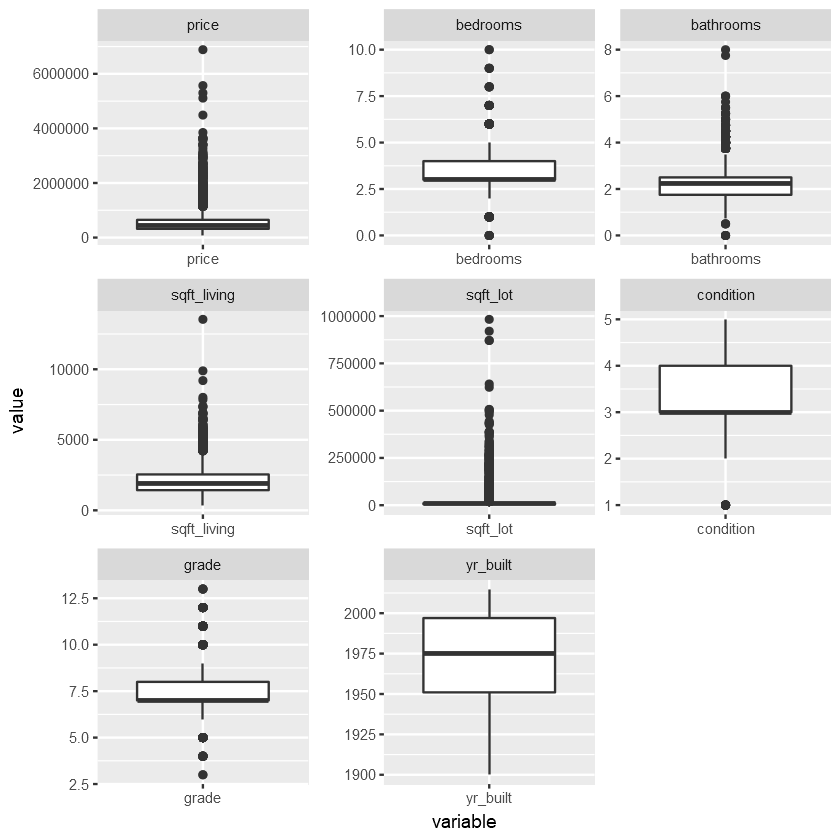

In [11]:
#reshape data for easy plotting
m1 <- melt(as.data.frame(train[,c(-6,-10)]))

#PLot boxplots
ggplot(m1,aes(x = variable,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

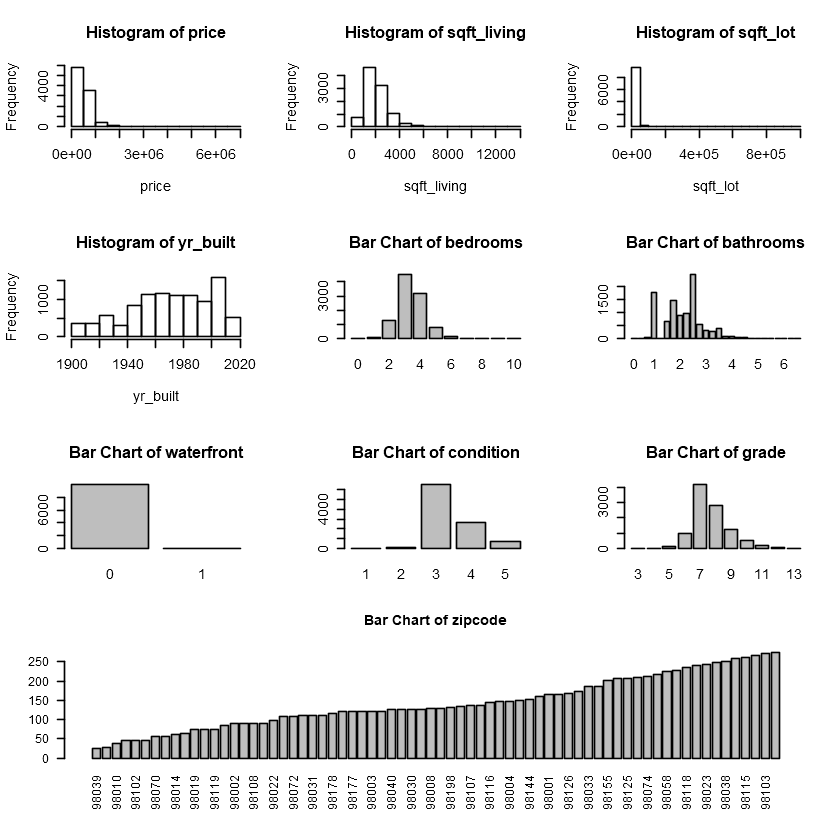

In [14]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,3))
hist(price)
hist(sqft_living)
hist(sqft_lot)
hist(yr_built)
plot(as.factor(bedrooms),main="Bar Chart of bedrooms") 
plot(as.factor(bathrooms),main="Bar Chart of bathrooms")
plot(as.factor(waterfront), main="Bar Chart of waterfront")
plot(as.factor(condition), main="Bar Chart of condition")
plot(as.factor(grade), main="Bar Chart of grade")

# plot zipcode on a separate row
par(fig=c(0,1,0,0.30),ps=10,new=TRUE)
barplot(sort(table(zipcode)),las=2,main="Bar Chart of zipcode")

These graphs show:
- Price, sqft_living and sqft_lot all have large positive skews
- Most houses have 2.5 bathrooms, other common values are 1 and 1.75.
- There are very few waterfront properties
- Most properties have condition of 3 or 4
- Most properties have grade of 7 or 8
- Few properties built between 1900 and 1940, fairly even spread from 1940 to 2000, an increase in properties built between 2000 and 2010
- The numbers of properties sold by zip code varies from about 25 to about 250

Next, we investigate some standout features, like `price`, `sqft_living`, `sqft_log` using a log scale to see if these variables have a log-normal distribution

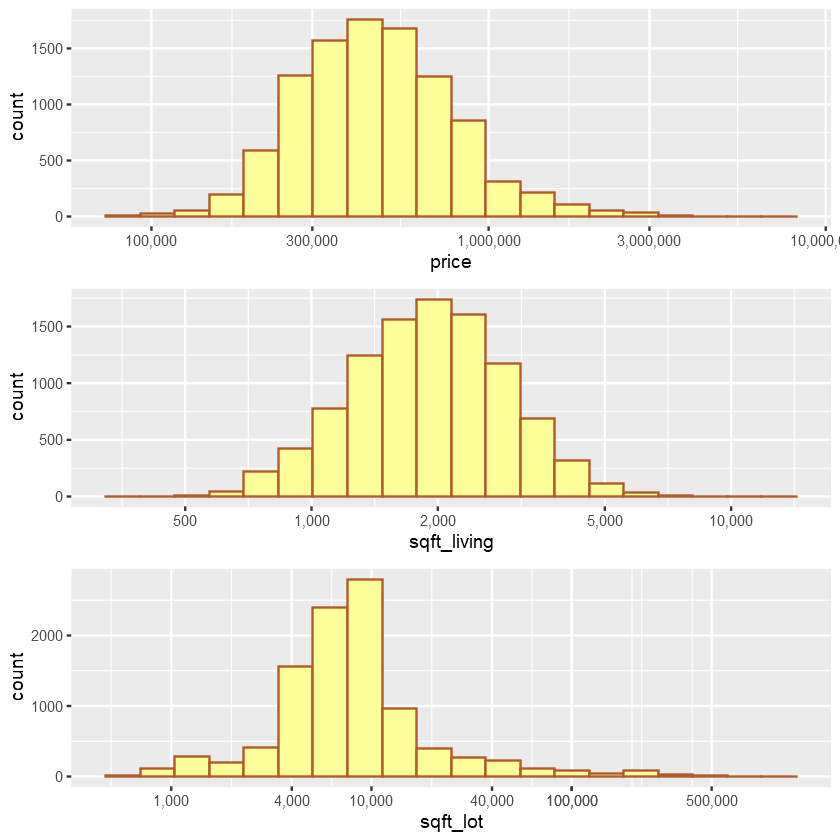

In [16]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p1 <- ggplot(aes(x=price), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(100000,300000,1000000,3000000,10000000)) 
p2 <- ggplot(aes(x=sqft_living), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(500,1000,2000,5000,10000))
p3 <- ggplot(aes(x=sqft_lot), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(1000,4000,10000,40000,100000,500000,100000))
grid.arrange(p1, p2, p3, ncol=1, nrow=3)

These graphs show:
- The log of price and sqft_living are (nearly) normally distributed.
- The log of the sqft_lot is not quite normal. The majority of lot sizes are between 4000 and 10,000 sqft, with a few outliers > 100,000 sqft

There was a drop in sales of houses built during the 1930's and an increase in sales of houses built during the 2000's. The following graphs provide a closer look at sales for these years.

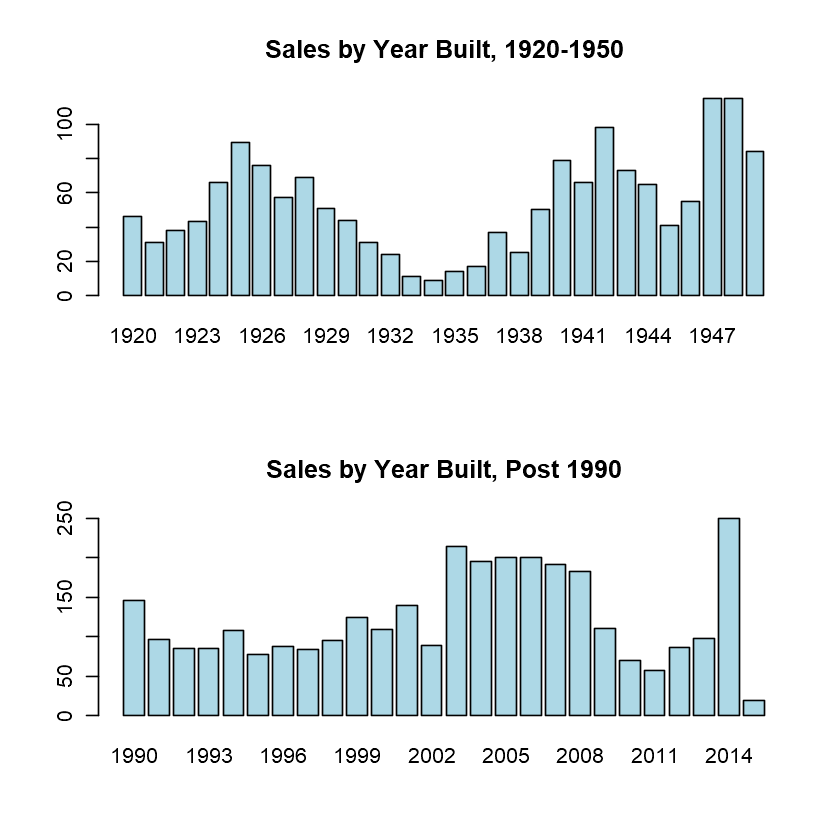

In [17]:
par(mfrow=c(2,1))
plot(as.factor(yr_built[yr_built >= 1920 & yr_built < 1950]),
     main = "Sales by Year Built, 1920-1950", col="lightblue")
plot(as.factor(yr_built[yr_built >= 1990]),
     main = "Sales by Year Built, Post 1990", col="lightblue")

There were very few houses sold that were built between 1933 and 1936 - these were depression years so maybe fewer houses were built. Then there was an increase in sales for houses built during WWII (so this data is probably not for a European city) and a spike during the post-war years of 1947 and 1948.

There was a jump in the number of houses sold that were built in 2003 to 2008. These houses were between six and twelve years old when they were sold. Fewer houses built between 2009 and 2013 were sold. These figures indicate that owners of new homes tend to own the house for at least six years before reselling. The sales volume of houses built in 2014 and 2015 show that about 2.5% of sales were for new houses.

One possible anomaly in the data is that there are houses with no bedrooms and/or no bathrooms. Take a closer look at these records.

In [19]:
train[bedrooms == 0 | bathrooms == 0,]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
37,139950,0,0.00,844,4269,0,4,7,1913,98001
987,235000,0,0.00,1470,4800,0,3,7,1996,98065
1295,355000,0,0.00,2460,8049,0,3,8,1990,98031
3523,265000,0,0.75,384,213444,0,3,4,2003,98070
4110,380000,0,0.00,1470,979,0,3,8,2006,98133
7081,339950,0,2.50,2290,8319,0,3,8,1985,98042
8099,280000,1,0.00,600,24501,0,2,3,1950,98045


These looks very strange. The first record describes a house with no bedrooms and no bathrooms but is in above average condition and of average grade. Record 7081 describes a house with no bedrooms but 2.5 bathrooms, so would suit a very clean person who doesn't sleep! Most (if not all) of these are likely to contain erroneous data.

### 1.2 Multivariate Analysis <a class="anchor" id="1.2"></a>

Let's first take a look at scatterplot matrix

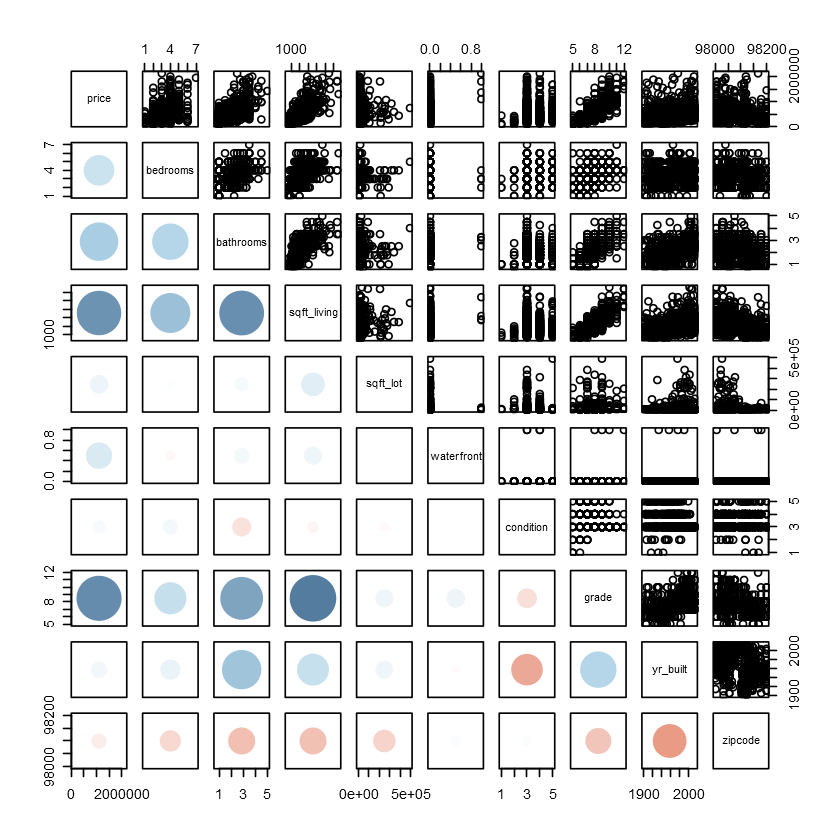

In [21]:
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

#Plot scatterplot matrix to visualize the correlations between variables
#Sample 1000 datapoints to prevent overcrowding the plot
pairs(train[sample.int(nrow(train),1000),], lower.panel=panel.cor)

Some notable points from the correlation matrix are:
- `Price` is strongly correlated to `sqft_living` and `grade`, has a weaker correlation to `bathrooms`, `bedrooms` and `waterfront`
- `Bedrooms`, `bathrooms`, `sqft_living`, `grade` and `yr_built` are all correlated to each other - in particular both `bathrooms` and `grade` are highly correlated to `sqft_living`
- There is quite a strong negative correlation between `condition` and `yr_built`
- There is very little correlation between the land size (`sqft_lot`) and `price`
- There is a correlation between `zipcode` and `yr_built`
- There is also a weak correlation between `price` and whether or not the property overlooks the waterfront (`waterfront`). 

Next, we examine how does looking at just these waterfront properties change the correlations?

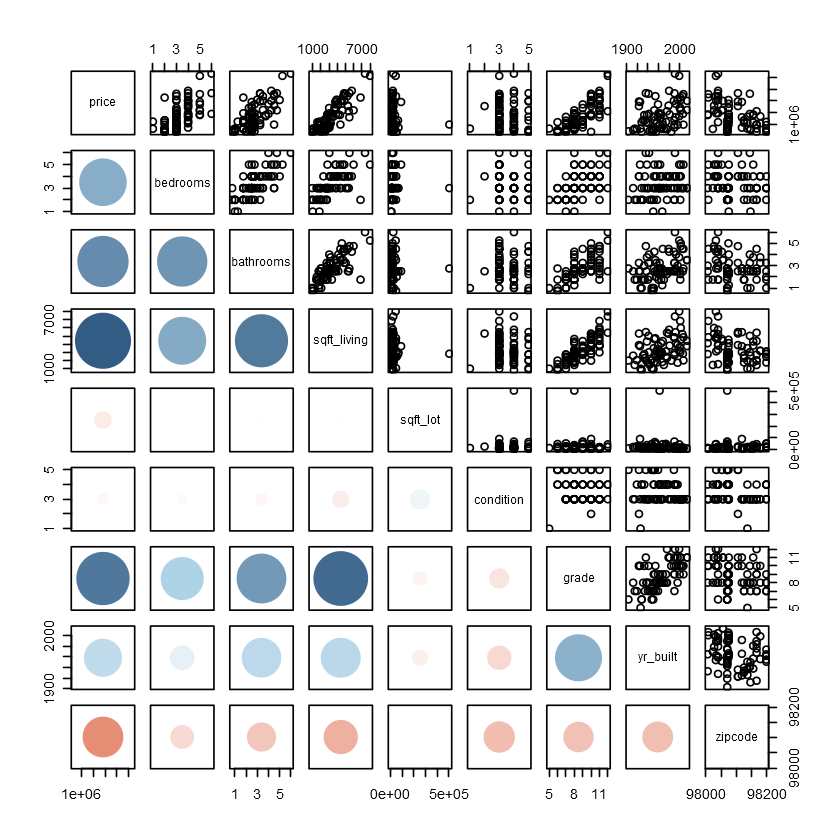

In [22]:
pairs(train[train$waterfront == 1,-6], lower.panel=panel.cor)

The correlations are similar but a few stronger ones:
- `yr_built` and `price`
- `bedrooms` with `bathrooms` and `grade`
- `grade` and `yr_built`
- The negative correlation between `condition` and `yr_built` is weaker
- There is a new correlation between `zipcode` and `price` - so the zipcode appears to have an effect on the price of waterfront properties, but not on other properties.

Next, we investigate correlations between price, bedrooms, bathrooms, sqft_living and grade

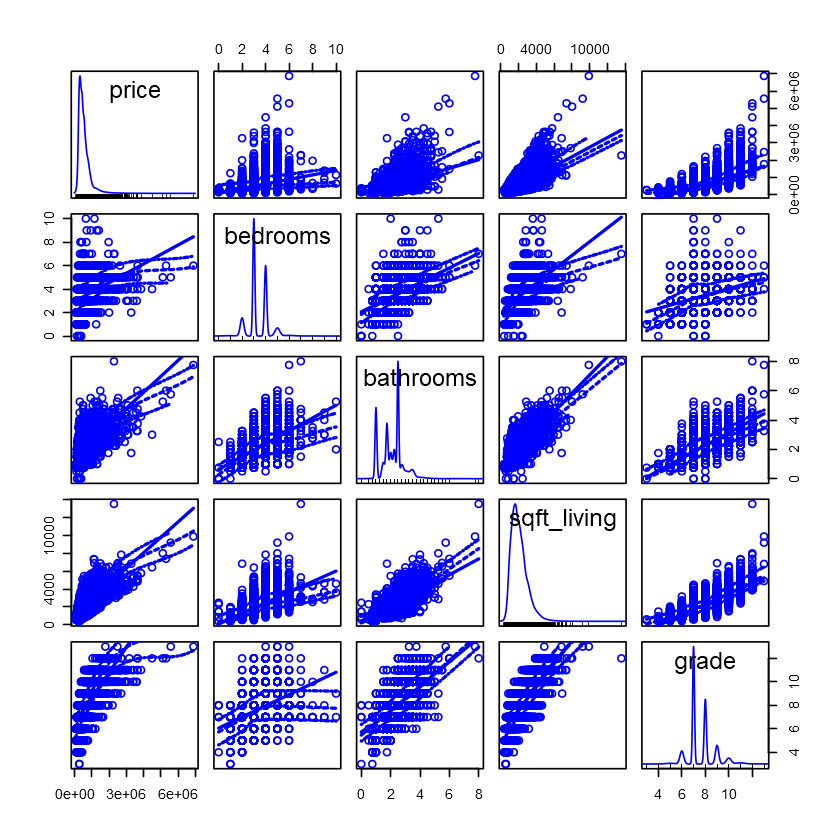

In [23]:
scatterplotMatrix(~price+bedrooms+bathrooms+sqft_living+grade,data=train)

The scatterplot matrix shows many of these relationships are non-linear - in particular the relationships between `price` and the other variables.

The relationship between `bedrooms` and the other variables looks to be linear for houses with between one and four bedrooms but changes for houses with more than four bedrooms.

In [24]:
#correlation coefficients
options(digit=4)
cor(train)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
price,1.00000000,0.323447334,0.52504888,0.69585342,0.09395122,0.294854421,0.03339897,0.66882708,0.06104914,-0.04954038
bedrooms,0.32344733,1.000000000,0.52172634,0.59093850,0.03469110,-0.003382128,0.02869909,0.36706035,0.14510025,-0.14563153
bathrooms,0.52504888,0.521726344,1.00000000,0.75075993,0.08910870,0.075340484,-0.12710070,0.67009159,0.50991168,-0.19423624
sqft_living,0.69585342,0.590938504,0.75075993,1.00000000,0.18653177,0.119909534,-0.06341728,0.76514670,0.32163620,-0.19173193
sqft_lot,0.09395122,0.034691101,0.08910870,0.18653177,1.00000000,0.026781743,-0.01655929,0.11716693,0.05835844,-0.13529799
waterfront,0.29485442,-0.003382128,0.07534048,0.11990953,0.02678174,1.000000000,0.01523496,0.08539789,-0.01816067,0.02621444
condition,0.03339897,0.028699085,-0.12710070,-0.06341728,-0.01655929,0.015234959,1.00000000,-0.15030923,-0.36384516,0.01225731
grade,0.66882708,0.367060349,0.67009159,0.76514670,0.11716693,0.085397892,-0.15030923,1.00000000,0.45181948,-0.17988686
yr_built,0.06104914,0.145100252,0.50991168,0.32163620,0.05835844,-0.018160668,-0.36384516,0.45181948,1.00000000,-0.34942515
zipcode,-0.04954038,-0.145631531,-0.19423624,-0.19173193,-0.13529799,0.026214436,0.01225731,-0.17988686,-0.34942515,1.00000000


The top positive correlations are between:
- sqft_living and grade
- sqft_living and bathrooms
- sqft_living and price
- grade and bathrooms
- grade and price

The only significant negative correlation is between yr_built and condition - so older houses are generally in better condition than newer houses

#### Factorise categorical variables

In [26]:
train$waterfront <- as.factor(train$waterfront)
train$condition <- as.factor(train$condition)
train$grade <- as.factor(train$grade)
train$zipcode <- as.factor(train$zipcode)
str(train)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : Factor w/ 70 levels "98001","98002",..: 65 24 42 43 52 50 61 59 24 4 ...


In [27]:
#Reshape for visualization and remove outliers
m1 <- melt(as.data.frame(train))
m1 <- m1[!(m1$variable == "sqft_living" & m1$value > 10000),]
m1 <- m1[!(m1$variable == "sqft_lot" & m1$value > 100000),]

Using waterfront, condition, grade, zipcode as id variables


#### Investigate `Grade` relationship with other variables

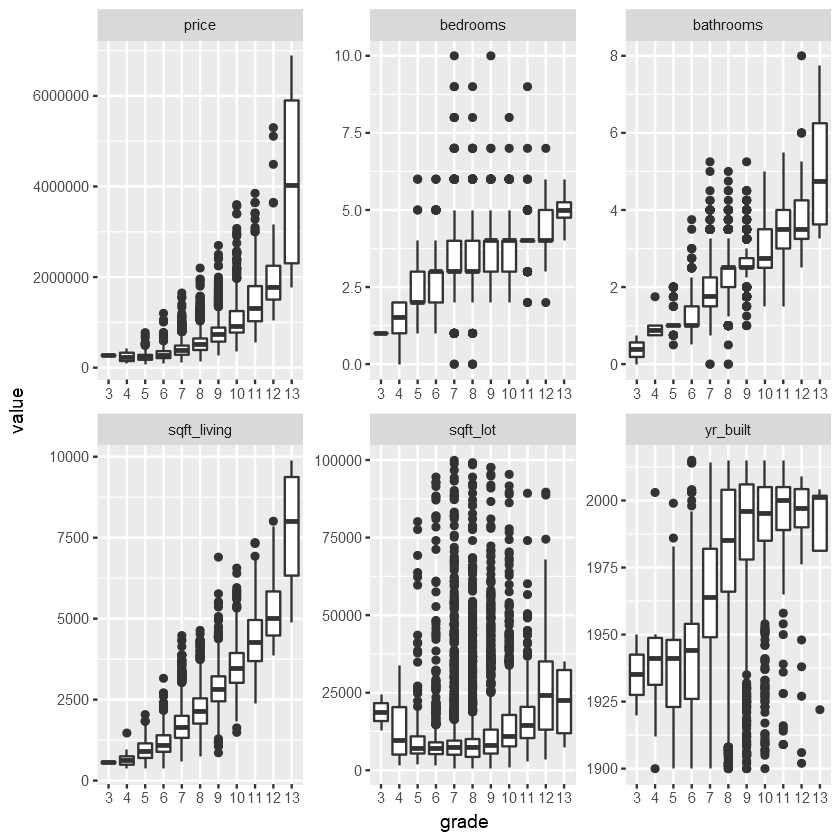

In [28]:
ggplot(m1,aes(x = grade,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

High grade houses:
- are higher priced than lower grade houses
- have more bedrooms and bathrooms
- are larger and on larger properties - but the lowest grade houses are also on larger properties
- tend to be newer houses

#### Investigate `Condition` relationship with other variables

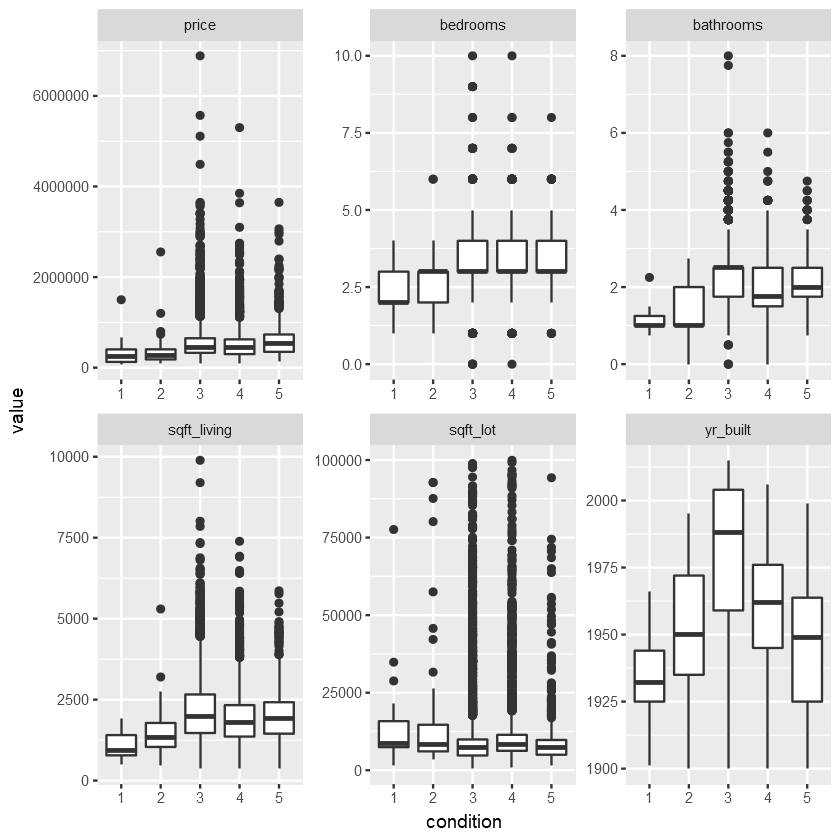

In [29]:
ggplot(m1,aes(x = condition,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

Houses in the best condition are similar to houses in average condition, but tend to be older and so are probably older houses that have been renovated to a very high standard.

Houses in poor condition, compared to those in average condition:
- Sell for slightly less
- Have fewer bedrooms and bathrooms
- Are smaller but on similar sized properties
- Are older houses

#### Investigate `Zipcode` relationship with other variables

Show a boxplot of each numeric variable by zipcode. Zipcodes are coloured according to whether at least one property with the zipcode is a waterfront property (red - a waterfront zipcode, blue - not a waterfront zipcode). Outliers are not shown to reduce graph clutter.

Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."

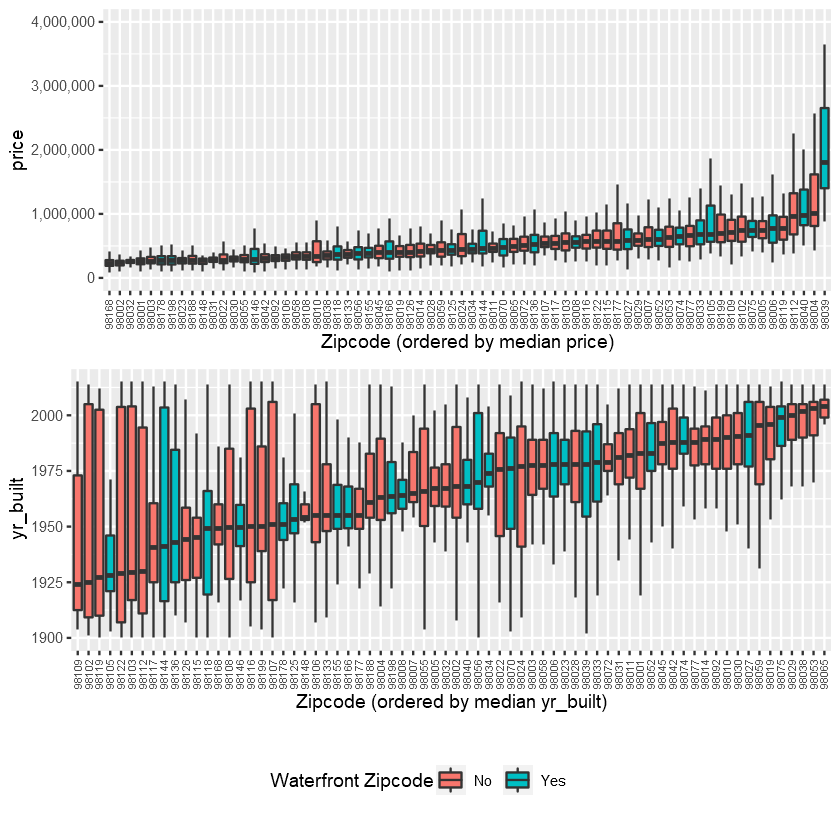

Warning message:
"Removed 8 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 214 rows containing non-finite values (stat_boxplot)."

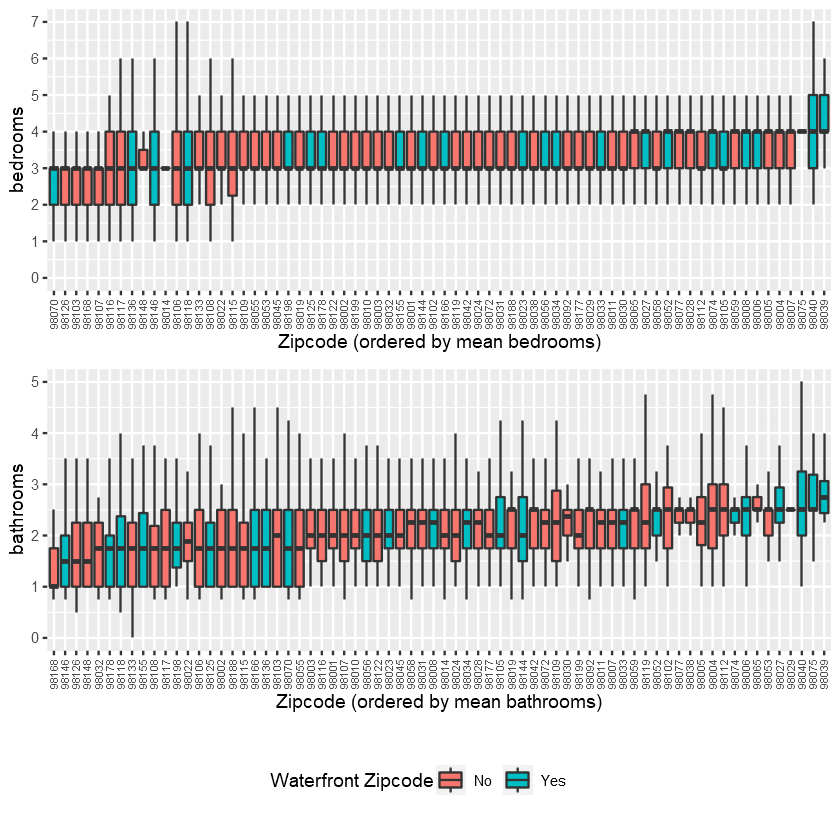

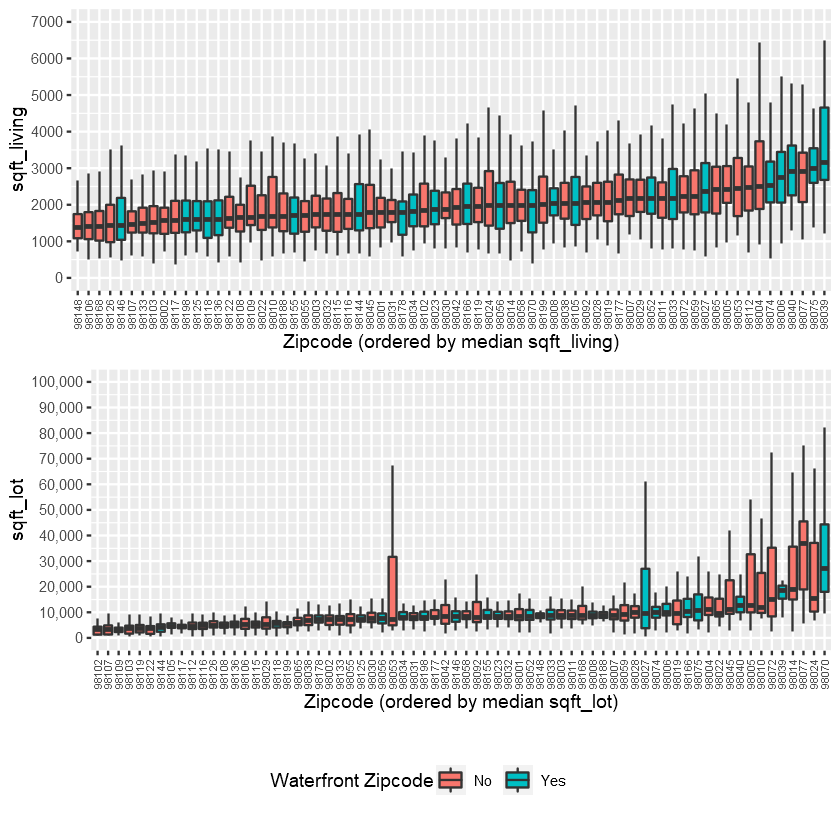

In [30]:
wf.zipcodes <- train$zipcode %in% unique(as.character(train$zipcode[waterfront==1]))

p1 <- ggplot(train,aes(x = reorder(zipcode,price,median),y = price)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,4000000), labels=comma) +
    scale_fill_discrete(name="Waterfront Zipcode", labels=c("No","Yes")) +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    xlab("Zipcode (ordered by median price)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

tmp <- ggplot_gtable(ggplot_build(p1))
leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
legend <- tmp$grobs[[leg]]

p2 <- ggplot(train,aes(x = reorder(zipcode,yr_built,median),y = yr_built)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median yr_built)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p1+theme(legend.position = 'none'), p2, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

p3 <- ggplot(train,aes(x = reorder(zipcode,bedrooms,mean),y = bedrooms)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,7),breaks=seq(0,7)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by mean bedrooms)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

p4 <- ggplot(train,aes(x = reorder(zipcode,bathrooms,mean),y = bathrooms)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,5),breaks=seq(0,5)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by mean bathrooms)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p3, p4, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

p5 <- ggplot(train,aes(x = reorder(zipcode,sqft_living,median),y = sqft_living)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,7000),breaks=seq(0,7000,1000)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median sqft_living)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

p6 <- ggplot(train,aes(x = reorder(zipcode,sqft_lot,median),y = sqft_lot)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,100000),breaks=seq(0,100000,10000), labels=comma) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median sqft_lot)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p5, p6, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

The above graphs show zipcodes are related to the other attributes in some interesting ways:
- There are a few high-priced zipcodes. The highest price zipcode contains waterfront properties.
- Quite a few zipcodes have predominately newer houses, a few have predominately "middle-aged" houses and a few have a range of older and newer houses.
- There is no real difference in number of bedrooms by zipcode
- Most zipcodes have mainly houses with more than one bathroom, but a few zipcodes have quite a few one bathroom houses (the lower hinge of the IQR is one).
- A few zipcodes have large houses and some very large properties
- Several of the zipcodes with larger houses have waterfront properties
- One zipcode (98039) stands out as having the highest prices, the most bedrooms and bathrooms and the largest houses. It has waterfront properties.

#### Waterfront Properties

The correlation matrices showed there are differences between how waterfront properties and non-waterfront properties are related to the other variables. These differences can be seen in the following charts.

Firstly, the differences of the numeric variable distributions between waterfront and non-waterfront properties are shown is the following density graphs.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 214 rows containing non-finite values (stat_density)."

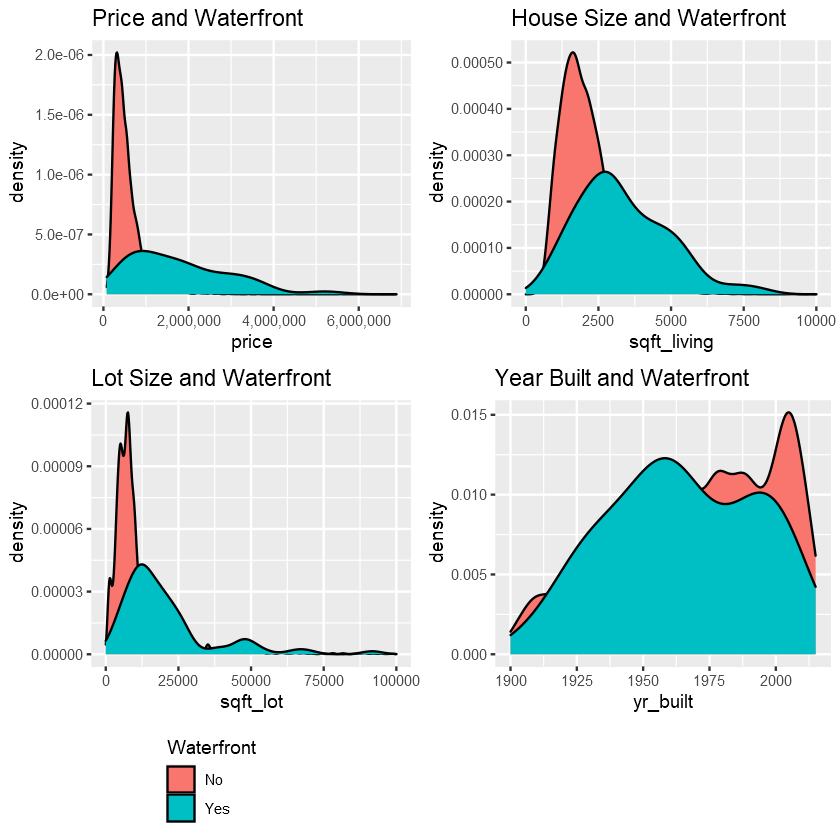

In [31]:
p1 <- ggplot(aes(x=price),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Price and Waterfront') +
    scale_x_continuous(labels=comma) +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p2 <- ggplot(aes(x=sqft_living),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('House Size and Waterfront') +
    scale_x_continuous(limits=c(0,10000)) +
    scale_y_continuous(labels=comma) +
    scale_fill_discrete(guide="none")

p3 <- ggplot(aes(x=sqft_lot),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Lot Size and Waterfront') +
    scale_x_continuous(limits=c(0,100000)) +
    scale_fill_discrete(guide="none")

p4 <- ggplot(aes(x=yr_built),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Year Built and Waterfront') +
    scale_fill_discrete(guide="none")

tmp <- ggplot_gtable(ggplot_build(p1))
leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
legend <- tmp$grobs[[leg]]

grid.arrange(p1+theme(legend.position = 'none'), p2, p3, p4, legend, ncol=2, nrow=3, heights=c(3/7,3/7,1/7))

Properties overlooking the waterfront have some quite different characteristics from other properties:
- They are more expensive than non-waterfront ones and have a wider price range
- They have a much wider range of both house size and plot size
- They are slightly older than non-waterfront ones

Next, we will investigate how waterfront properties differ from non-waterfront ones in terms of the number of bathrooms, condition and grade; and which zipcodes contain waterfront properties.

Warning message:
"Removed 2 rows containing non-finite values (stat_count)."Warning message:
"Removed 3 rows containing missing values (geom_bar)."

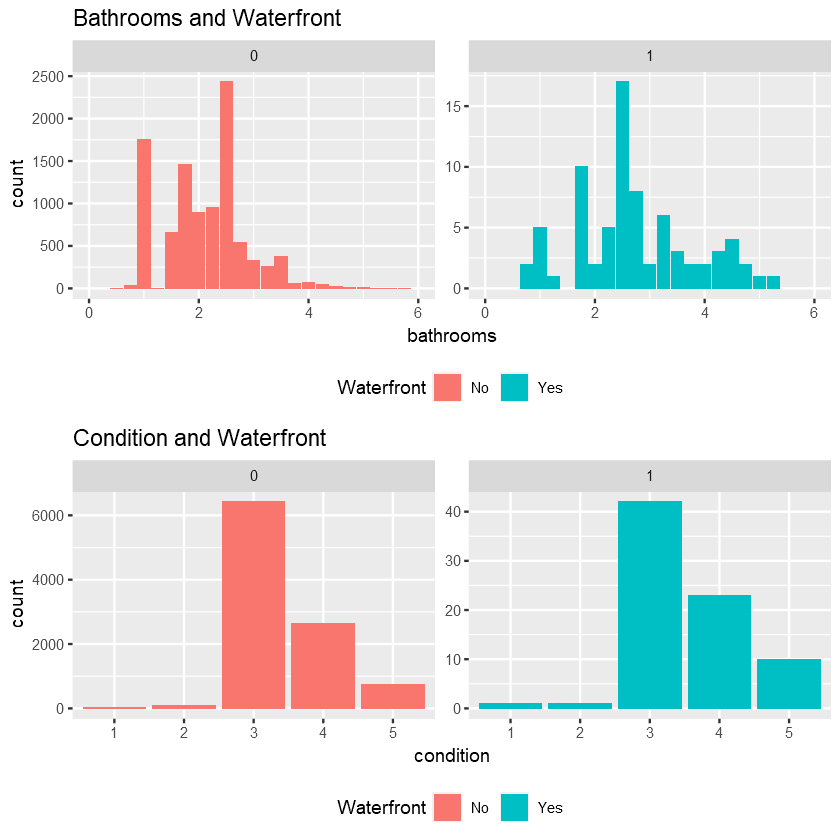

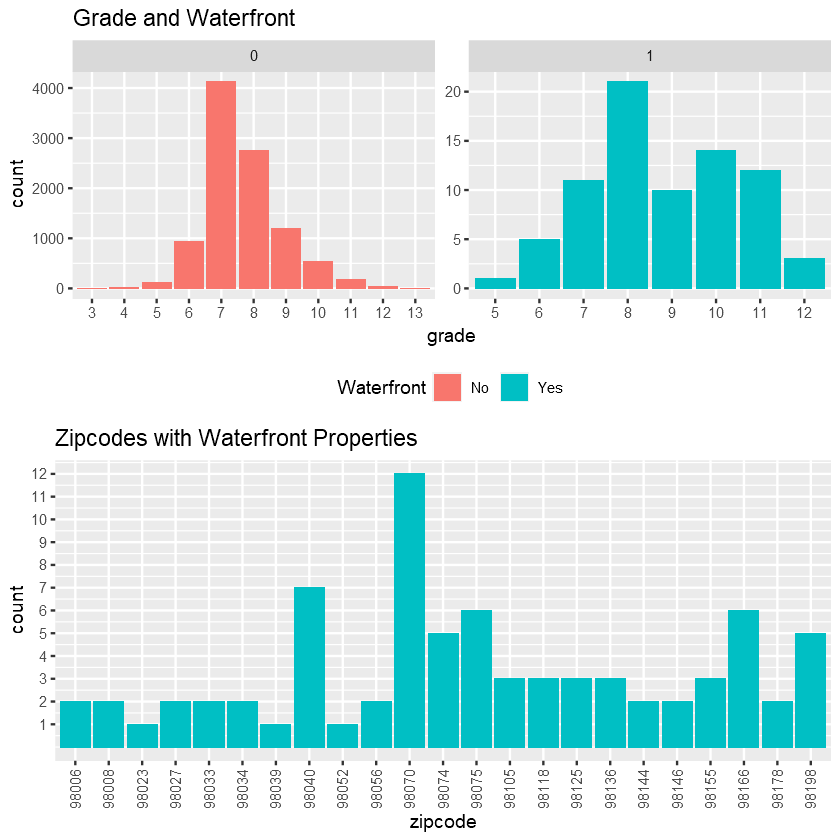

In [32]:
p1 <- ggplot(aes(x=bathrooms, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Bathrooms and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    scale_x_continuous(limits=c(0,6)) +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p2 <- ggplot(aes(x=condition, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Condition and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p3 <- ggplot(aes(x=grade, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Grade and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
   scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p4 <- ggplot(aes(x=zipcode, fill=waterfront),data = train[train$waterfront == 1,]) +
   geom_bar(fill="#00BFC4") +
   ggtitle('Zipcodes with Waterfront Properties') +
   scale_y_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) +
   theme(axis.text.x = element_text(angle = 90, vjust=0.5))

grid.arrange(p1, p2, ncol=1, nrow=2)
grid.arrange(p3, p4, ncol=1, nrow=2)

Additional characteristics of waterfront properties compared to non-waterfront ones are:
- These houses have more bathrooms
- There are a higher proportion of houses in very good condition - but also in poor condition
- There are a higher proportion of high grade properties

The last plot shows that only 23 of the zipcodes had sales of waterfront properties and only six of these had more than three sales of waterfront properties.

#### How have House Features Changed over Time?

Look at the relationship between year built and bedrooms, bathrooms, grade and condition. Plot graphs using stacked barcharts showing proprotionality to see how these have changed over time. Years are grouped into decades to reduce the chart clutter.

Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message:
"Removed 87728 rows containing non-finite values (stat_count)."Warning message:
"position_stack requires non-overlapping x intervals"Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
"

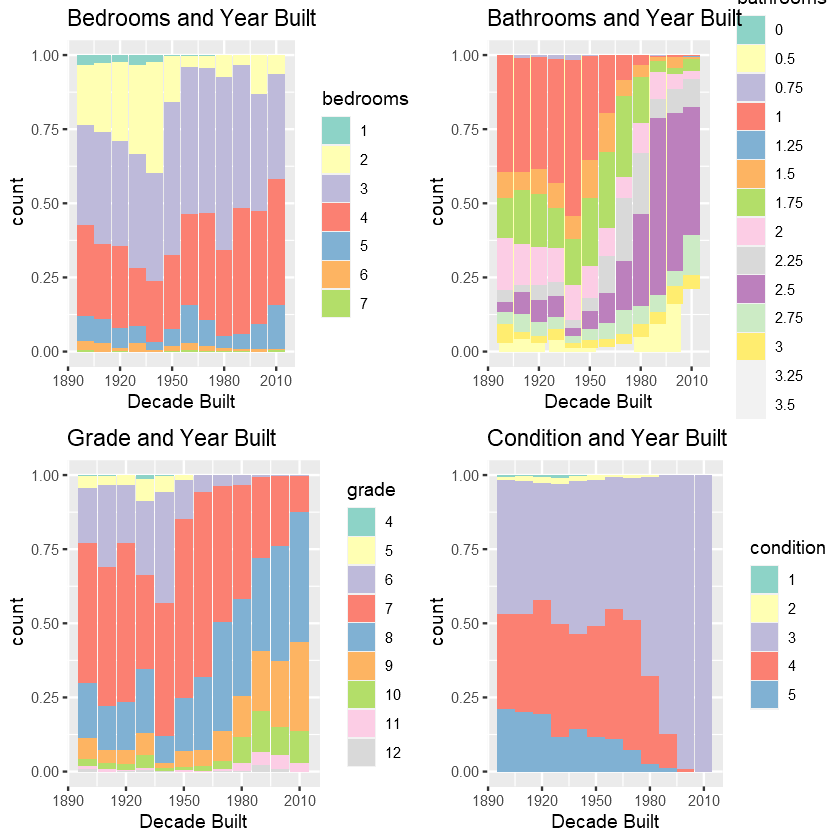

In [34]:
p1 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = as.factor(bedrooms)),data = train[bedrooms >= 1 & bedrooms < 8,]) +
    geom_bar(position="fill") +
    ggtitle('Bedrooms and Year Built') +
    scale_fill_brewer(palette="Set3",name="bedrooms") +
    xlab("Decade Built")

p2 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = as.factor(bathrooms)),data = train[train >= 1 & bathrooms <= 3.5,]) +
    geom_bar(position="fill") +
    ggtitle('Bathrooms and Year Built') +
    scale_fill_brewer(palette="Set3",name="bathrooms") +
    xlab("Decade Built")

p3 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = grade),data = train[grade >= 4 & grade < 13,]) +
    geom_bar(position="fill") +
    ggtitle('Grade and Year Built') +
    scale_fill_brewer(palette="Set3",name="grade") +
    xlab("Decade Built")

p4 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = condition),data = train) +
    geom_bar(position="fill") +
    ggtitle('Condition and Year Built') +
    scale_fill_brewer(palette="Set3",name="condition") +
    xlab("Decade Built")

grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

These charts show:
- Two bedroom houses were common before the 1950's but are rare more recently, with three and four bedrooms becoming more common
- Most houses built before 1960 had only one bathroom, two and a half bathrooms is usual for recent houses
- Older houses tend to be of lower grade
- All the houses in poor condition tend to be older - but the houses in really good condition are also older. Most newer houses are in average condition

#### Association between Bedrooms, House Size and Price

The earlier scatterplot matrices show the relationship between bedrooms and house size, and bedrooms and price is different for houses with more than four bedrooms than for those with four or fewer bedrooms. Does plotting all three of these variables together show more about these relationships?

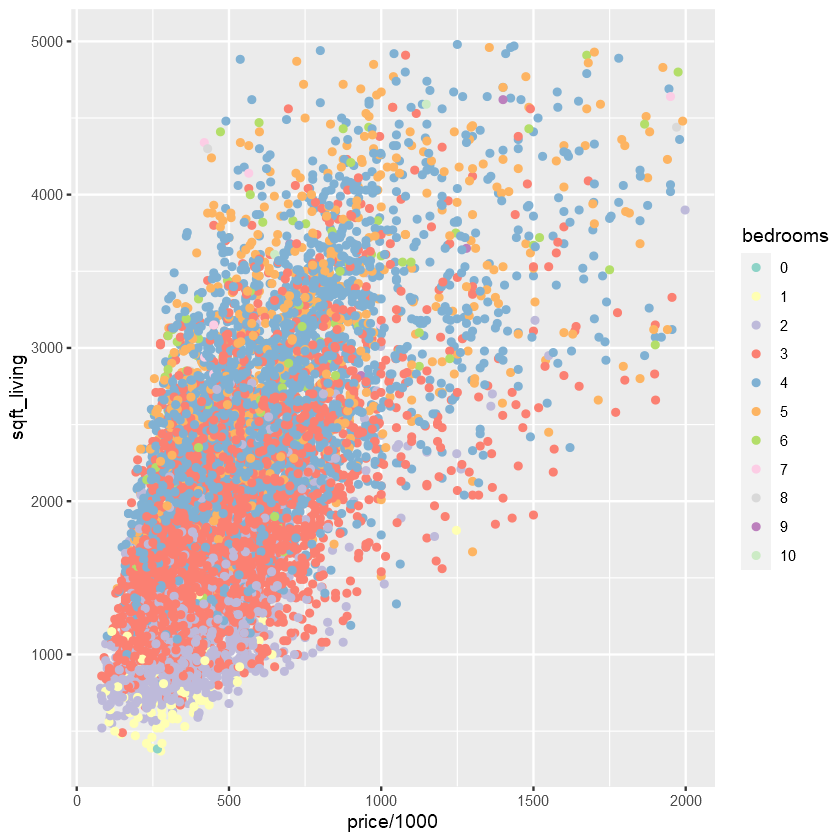

In [36]:
ggplot(aes(x=price/1000,y=sqft_living,colour=as.factor(bedrooms)),
             data = train[train$price < 2000000 & train$sqft_living < 5000,]) +
    geom_point() + 
    scale_colour_brewer(name="bedrooms",palette="Set3")

This plot shows that the number of bedrooms, the house size and the price increase together for houses between 1 and 4 bedrooms. Houses with more than 4 bedrooms look to be both have similar prices and be of similar size to 4 bedroom houses.

### Summary of EDA findings

The provided house sales data has 10000 records with 11 attributes for each record. The provided descriptions for each attribute and some additional notes are:

1. Id: Unique ID for each home sold
2. Price: Price of each home sold
3. Bedroom: #bedrooms
 - Values range from 0-10
4. Bathrooms: #bathrooms, where .5 accounts for a bathroom with a toilet but no shower
 - Values range from 0-8 and include .25 and .75, as well as .5
5. Sqft_living: Square footage of the apartments interior living space
6. Sqft_lot: Square footage of the land space
7. Waterfront: A binary variable indicating whether the property was overlooking the waterfront or not. 1’s represent a waterfront property, 0’s represent a non-waterfront property
8. Condition: An index from 1 to 5 on the condition of the apartment, 1 - lowest, 5 - highest
9. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.
 - Grades 1 and 2 are not present in the training data
10. Yr_built: The year the house was initially built.
 - Values range from 1900 to 2015
11. Zipcode: What postcode area the house is in

#### Univariate Analysis

Some houses appear to have been sold more than once during the year.

Price, sqft_living and sqft_lot have very skewed distributions. Plotting the log values of these variables shows a more normal distribution.

There were very few houses sold that were built between 1933 and 1936 - these were depression years so maybe fewer houses were built. Then there was an increase in sales for houses built during WWII and a spike during the post-war years of 1947 and 1948.

A spike in the sales of houses built between 2003 and 2008 was observed, probably indicating theat people who bought new homes then are now selling them. 

#### Multivariate Analysis

As might be expected, the sale price of a house appears to be determined by a range of factors including the size of the house, the number of bedrooms and bathrooms, the grade and the year the house was built. These variables are all inter-related with larger houses have more bedrooms and bathrooms; and the size, number of bedrooms and bathrooms all contributing to the grade. Two specific observations are:

- The size and grade of the house are the most highly correlated to the price are sqft_living and grade.

- The correlation between bedrooms and the other variables decreases for houses with more than four bedrooms.

What is a little surprising is that the condition of the house and the size of the lot do not appear to have a big effect on the price. A closer look at the condition showed that being in poor condition does lead to a lower price, but there are not many houses in poor condition. Being in better than average condition does not lead to a better price.

The condition and the age of the house are negatively correlated, implying that older houses are generally in better condition than newer houses. However the houses in the worst condition are also older houses. The majority of newer houses are in average condition.

There are several differences between properties that overlook the waterfront and other properties. Waterfront properties are usually higher-priced, larger, in better condition and higher grade houses, but as only 77 waterfront properties were sold some of these differences may not generalise to other sets of data.

An unexpected observation is that there appears to be a slight correlation between the number of bathrooms, whether or not the property overlooks the waterfront and the zipcode.

## 2. Model Building <a class="anchor" id="2"></a>

In [37]:
#Reload the dataframe and factorize the categorical variables
train <- read.csv("training.csv")
train <- train[,-1]

train$waterfront <- as.factor(train$waterfront)
train$condition <- as.factor(train$condition)
train$grade <- as.factor(train$grade)
train$zipcode <- as.factor(train$zipcode)

str(train)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : Factor w/ 70 levels "98001","98002",..: 65 24 42 43 52 50 61 59 24 4 ...


Next, we define some functions, to evaluate model accuracy

Name: Model.Accuracy

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 
- df - the degrees of freedom
- p - the number of parameters excluding the coefficient

Return Value:

A list containing:
- rsquared - the R-Squared value calculated from the predicted and target values
- rse - the residual standard error
- f.stat - the F-statistic

Description:

Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the statistics according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- Residual standard error - $\sqrt{\frac{1}{df}RSS}$
- F-statistics - $\frac{(TSS - RSS)/p}{RSS / df}$

Name: RMSE

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 

Return Value:

The RMSE value calculated from the predicted and target values

Description:

Calculate the RMSE value: $RMSE = \sqrt {\sum_{i=1}^n (\hat y_i - y_i)^2 / N}$

In [39]:
Model.Accuracy <- function(predicted, target, df, p) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

### First model

Fit a first model using all variables

In [40]:
fit1 <- lm(price ~ ., data=train)
summary(fit1)


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1247108   -65534      265    55635  1899005 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.431e+06  2.003e+05   7.143 9.75e-13 ***
bedrooms     -1.144e+04  2.288e+03  -5.001 5.79e-07 ***
bathrooms     2.518e+04  3.634e+03   6.930 4.47e-12 ***
sqft_living   1.470e+02  3.681e+00  39.946  < 2e-16 ***
sqft_lot      2.178e-01  4.453e-02   4.890 1.02e-06 ***
waterfront1   8.853e+05  1.834e+04  48.260  < 2e-16 ***
condition2    6.572e+04  3.958e+04   1.660 0.096860 .  
condition3    7.826e+04  3.626e+04   2.158 0.030926 *  
condition4    1.022e+05  3.627e+04   2.818 0.004840 ** 
condition5    1.365e+05  3.659e+04   3.730 0.000192 ***
grade4       -8.206e+04  1.171e+05  -0.700 0.483632    
grade5       -1.220e+05  1.105e+05  -1.104 0.269618    
grade6       -1.240e+05  1.098e+05  -1.130 0.258690    
grade7       -1.140e+05  1.098e+05  -1.038 0.299068 

The adjusted R-squared ($R^2$) value indicates this model explains 82.6% of the variation in house prices.

The F-statistic 533 has a p-value < 2.2e-16 - so reject the null hypothesis (the model explains nothing) - the model is useful

The p-values for the coefficients show all the non-factor variables are significant at the 0.05 level. The factors all have levels that are significant, but some levels of grade and zipcode are not.

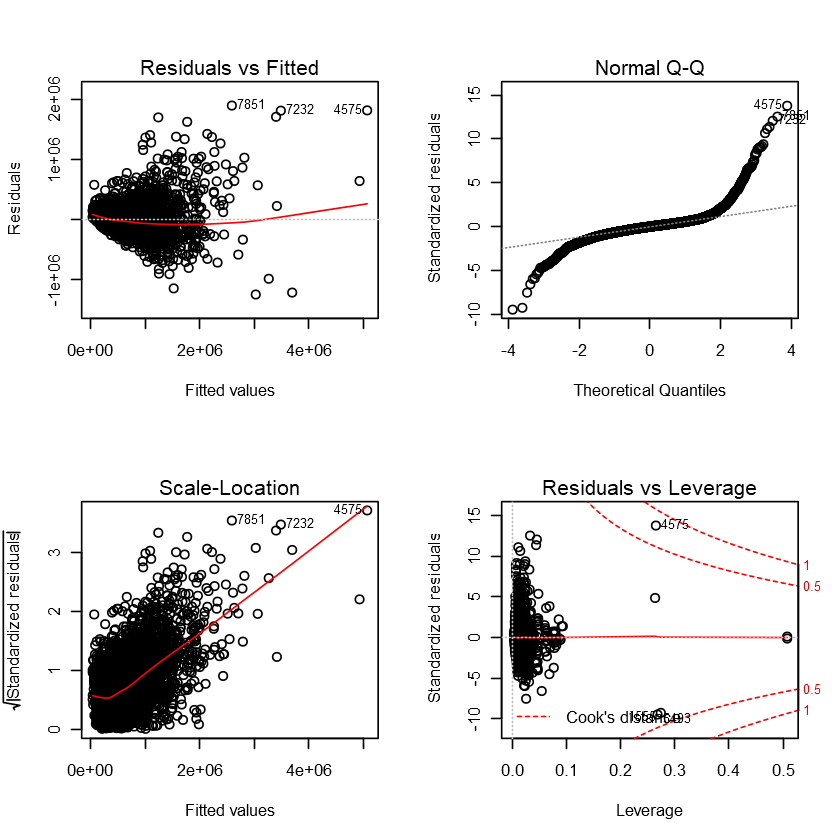

In [41]:
#Diagnostic plots
par(mfrow=c(2,2))
plot(fit1)

The diagnostic plots show:
- Residual vs Fitted - shows the residuals reasonably evenly distributed around zero, but they funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- Normal Q-Q - the residuals deviate significantly from the dashed line, indicating the residuals are not normally distributed
- Scale-Location - The chart shows the model violates the assumption of equal variance
- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they appear to cancel each other out

In [42]:
#Use step() function to remove unimportant variables
step(fit1)

Start:  AIC=238963.1
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + 
    condition + grade + yr_built + zipcode

              Df  Sum of Sq        RSS    AIC
<none>                      2.3454e+14 238963
- sqft_lot     1 5.6604e+11 2.3511e+14 238985
- bedrooms     1 5.9200e+11 2.3513e+14 238986
- bathrooms    1 1.1366e+12 2.3568e+14 239009
- yr_built     1 1.7687e+12 2.3631e+14 239036
- condition    4 2.5188e+12 2.3706e+14 239062
- sqft_living  1 3.7765e+13 2.7231e+14 240454
- waterfront   1 5.5121e+13 2.8966e+14 241072
- grade       10 6.3988e+13 2.9853e+14 241355
- zipcode     69 2.0542e+14 4.3996e+14 245116



Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode, data = train)

Coefficients:
 (Intercept)      bedrooms     bathrooms   sqft_living      sqft_lot  
   1.431e+06    -1.144e+04     2.518e+04     1.470e+02     2.178e-01  
 waterfront1    condition2    condition3    condition4    condition5  
   8.853e+05     6.572e+04     7.826e+04     1.022e+05     1.365e+05  
      grade4        grade5        grade6        grade7        grade8  
  -8.206e+04    -1.220e+05    -1.240e+05    -1.140e+05    -7.400e+04  
      grade9       grade10       grade11       grade12       grade13  
   2.521e+04     1.721e+05     4.050e+05     8.199e+05     2.138e+06  
    yr_built  zipcode98002  zipcode98003  zipcode98004  zipcode98005  
  -7.282e+02     7.901e+03    -1.158e+03     7.371e+05     2.781e+05  
zipcode98006  zipcode98007  zipcode98008  zipcode98010  zipcode98011  
   2.662e+05     2.425e+05     2.636e+05     5.397e+04  

Running step in backward direction has not removed any variables, so all are significant

### Account for the Heteroscedasticity

This second model corrects the heteroscedasticity seen in the first model by using a log transformation of the response variable. It also uses log transformations of the sqft_living and sqft_lot predictor variables as the distributions of these variables were skewed.

In [44]:
fit2 <- lm(log(price) ~ . + log(sqft_living) + log(sqft_lot), data=train)
summary(fit2)


Call:
lm(formula = log(price) ~ . + log(sqft_living) + log(sqft_lot), 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04649 -0.10225  0.00246  0.10389  1.12309 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.032e+01  2.959e-01  34.880  < 2e-16 ***
bedrooms         -1.755e-02  2.859e-03  -6.138 8.69e-10 ***
bathrooms         3.764e-02  4.508e-03   8.350  < 2e-16 ***
sqft_living       5.551e-05  9.325e-06   5.953 2.73e-09 ***
sqft_lot         -2.897e-08  7.268e-08  -0.399 0.690195    
waterfront1       6.557e-01  2.247e-02  29.176  < 2e-16 ***
condition2        1.089e-01  4.844e-02   2.247 0.024637 *  
condition3        2.689e-01  4.439e-02   6.057 1.43e-09 ***
condition4        2.991e-01  4.440e-02   6.736 1.71e-11 ***
condition5        3.608e-01  4.480e-02   8.052 9.06e-16 ***
grade4           -4.699e-01  1.434e-01  -3.277 0.001051 ** 
grade5           -5.052e-01  1.353e-01  -3.734 0.000190 ***
grade6     

From the summary of the model:
- The F-statistic of 766 is significant at the 0.001 level, so this model is also useful.
- The $R^2$ value shows the model explains 87.4% of the variance, so this seems to indicate using logs is helping to explain more of the model.
- The p-values of the coefficients show that sqft_lot is below the 0.05 significance level and so the null hypothesis (this variable does not help explain the variance) cannot be rejected. Run step to remove it and anything else that is not significant

In [45]:
fit2 <- step(fit2)
summary(fit2)

Start:  AIC=-33305.89
log(price) ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot)

                   Df Sum of Sq    RSS    AIC
- sqft_lot          1      0.01 351.20 -33308
<none>                          351.20 -33306
- yr_built          1      0.95 352.15 -33281
- sqft_living       1      1.26 352.45 -33272
- bedrooms          1      1.34 352.53 -33270
- bathrooms         1      2.47 353.67 -33238
- condition         4      9.50 360.69 -33047
- log(sqft_lot)     1      9.60 360.79 -33038
- log(sqft_living)  1     10.58 361.78 -33011
- waterfront        1     30.17 381.37 -32484
- grade            10     59.22 410.42 -31768
- zipcode          69    621.57 972.77 -23256

Step:  AIC=-33307.73
log(price) ~ bedrooms + bathrooms + sqft_living + waterfront + 
    condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot)

                   Df Sum of Sq    RSS    AIC
<none


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04636 -0.10217  0.00259  0.10392  1.12291 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.034e+01  2.908e-01  35.565  < 2e-16 ***
bedrooms         -1.748e-02  2.853e-03  -6.125 9.41e-10 ***
bathrooms         3.751e-02  4.495e-03   8.344  < 2e-16 ***
sqft_living       5.535e-05  9.316e-06   5.941 2.92e-09 ***
waterfront1       6.560e-01  2.246e-02  29.205  < 2e-16 ***
condition2        1.088e-01  4.843e-02   2.247 0.024640 *  
condition3        2.688e-01  4.439e-02   6.056 1.44e-09 ***
condition4        2.991e-01  4.440e-02   6.737 1.71e-11 ***
condition5        3.607e-01  4.480e-02   8.052 9.11e-16 ***
grade4           -4.708e-01  1.433e-01  -3.284 0.001026 ** 
grade5           -5.062e-01  1.353e-01 

Step has removed sqft_lot, but nothing else

The $R^2$ value is still 87.4%.

The $R^2$ value is calculated on the predicted log of the price, so calculate the $R^2$ for the prices using the Model.Accuracy function defined above

In [47]:
train.predict <- exp(fit2$fitted.values)
cat("R-Squared:",Model.Accuracy(train.predict,train$price,9889,110)$rsquared)

R-Squared: 0.8685771

That has lowered $R^2$ slightly to 86.8%, but that is still an improvement of over 3% on the first model.

Check for diagnostic plots

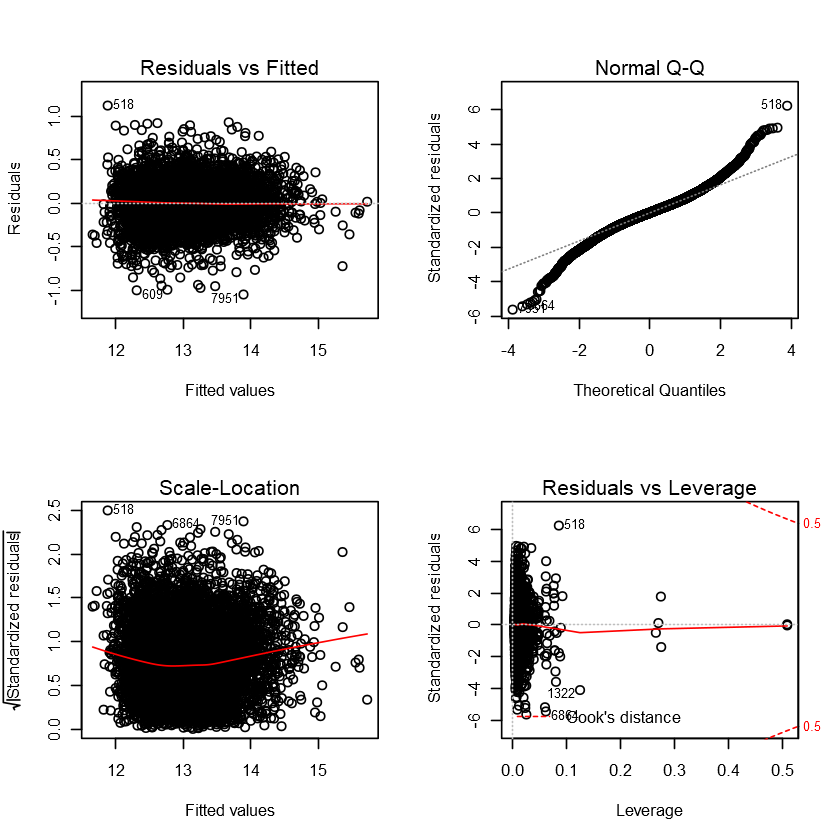

In [48]:
par(mfrow=c(2,2))
plot(fit2)

That has improved the residual plots.  The residuals are more evenly distributed and the scale location shows the variance is nearly equal. The Normal Q-Q plot shows that the residuals are not quite normally distrbuted, though.

Estimating the log of price rather than price directly and using the log of sqft_living and sqlt_lot has helped meet the linear regression assumptions and improved the $R^2$ value by over 3%.

### Correlation and Interaction

What about correlation between the variables?

Add some interaction terms for the correlated variables - sqft_living, bathrooms and grade, also the negative correlation between yr_built and condition and the correlation between waterfront and zipcode

In [50]:
fit3 <- lm(log(price) ~ bedrooms + bathrooms + sqft_living + waterfront + condition + grade +
           yr_built + zipcode + log(sqft_living) + log(sqft_lot) + sqft_living:grade + 
           sqft_living:bathrooms + grade:bathrooms + yr_built:condition + waterfront:zipcode, 
           data = train)
summary(fit3)


Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    waterfront + condition + grade + yr_built + zipcode + log(sqft_living) + 
    log(sqft_lot) + sqft_living:grade + sqft_living:bathrooms + 
    grade:bathrooms + yr_built:condition + waterfront:zipcode, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02095 -0.09760  0.00239  0.10092  1.13324 

Coefficients: (48 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -5.156e+00  5.282e+00  -0.976 0.329019    
bedrooms                 -1.636e-02  2.832e-03  -5.777 7.82e-09 ***
bathrooms                 1.018e-01  1.554e-01   0.655 0.512296    
sqft_living               8.147e-04  3.613e-03   0.225 0.821607    
waterfront1               5.105e-01  8.467e-02   6.029 1.71e-09 ***
condition2                1.186e+01  5.138e+00   2.308 0.021036 *  
condition3                1.285e+01  4.875e+00   2.637 0.008382 ** 

Several of these variables and interactions look like they are not significant:
- bathrooms
- sqft_living
- grade
- sqft_living:grade
- bathrooms:grade

Bathrooms:grade will be removed in the next iteration of the model, sqft_living:grade becomes more significant in the next iteration and so is retained.

As sqft_living:bathrooms is significant and sqft_living:grade ends up being significant, sqft_living, grade and bathrooms need to remain in the model.

There are also lots of NAs due to zipcodes that don't have any waterfront properties, and warnings about singularities - factors or interactions between factors that only have one record.


Check the $R^2$ value using the Model.Accuracy function and the residual plots

R-Squared: 0.8850423

Warning message:
"not plotting observations with leverage one:
  513, 639, 5900, 6061, 8099"Warning message:
"not plotting observations with leverage one:
  513, 639, 5900, 6061, 8099"

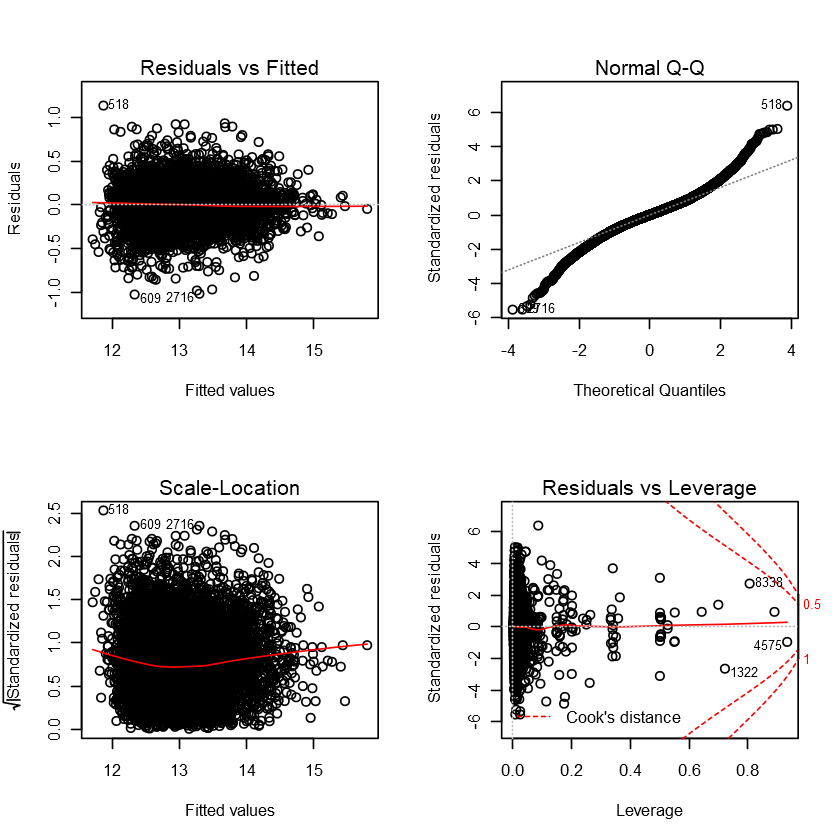

In [51]:
train.predict <- exp(fit3$fitted.values)
cat("R-Squared:",Model.Accuracy(train.predict,train$price,9863,136)$rsquared)

par(mfrow=c(2,2))
plot(fit3)

The $R^2$ value has improved by another 2% and the residual plots are still looking good, but produced a couple of warning messages. Look at the records referenced in the warnings

In [53]:
predict.price <- train.predict[c(513, 639, 8099)]
cbind(predict.price,train[c(513, 639, 8099),])

,predict.price,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
513,629000,629000,3,1.75,1460,12367,1,4,8,1970,98023
639,2200000,2200000,5,4.25,4640,22703,1,5,8,1952,98052
8099,280000,280000,1,0.00,600,24501,0,2,3,1950,98045


These are records for which the model has made a completely accurate prediction. Two of these reference waterfront properties and the other one looks a bit strange with no bathrooms so it may be an outlier.

### Feature Engineering

Generating a couple of new variables will allow the linear regression to better model some of the interactions. These variables will be added:

#### A Variable to handle the Waterfront:Zipcode Interaction

This variable will allow the model to include :
- If the property is not a waterfront property, set wf.zipcode to the zipcode
- If the property is a waterfront property and the zipcode has more than two waterfront properties, then set wf.zipcode to the zipcode appended with the characters "-1"
- The remaining waterfront properties will be grouped according to whether the zipcode is a low, mid or high priced zipcode.
- During model evaluation, some of the waterfront properties in the individual zipcodes were found to be influencers. The zipcodes containing these properties have been added to the groups to lessen the influence of these observations.

#### A Variable to Group Year Built by Decade

This variable groups the year_built by decade and is factorised to allow the regression to model changes over time that cannot be captured by a mathematical expression.

#### A variable to Classify Houses by Bedrooms

This variable to classify houses into two groups by bedrooms:
1. Houses with four or fewer bedrooms
2. Houses with more than four bedrooms

Analysis of the waterfront properties by zipcode

In [54]:
wf1 <- aggregate(train$zipcode[train$waterfront==1], list(train$zipcode[train$waterfront==1]), NROW)
names(wf1) <- c("zipcode","wf.count")
wf2 <- aggregate(train$price[train$waterfront==1], list(train$zipcode[train$waterfront==1]), mean)
names(wf2) <- c("zipcode","price.mean")
wf3 <- cbind(wf1,wf2["price.mean"])
wf4 <- wf3[wf3$wf.count > 2 & !(wf3$zipcode %in% c(98125,98074,98155,98118)),]
cat("Individual waterfront zipcodes:\n")
print(wf4)
wf5 <- wf3[!(wf3$zipcode %in% wf4$zipcode),]
cat("\nLow-price waterfront zipcodes:\n")
print(wf5[wf5$price.mean <= 1000000,])
cat("\nMid-price waterfront zipcodes:\n")
print(wf5[wf5$price.mean > 1000000 & wf5$price.mean <= 2400000,])
cat("\nHigh-price waterfront zipcodes:\n")
print(wf5[wf5$price.mean > 2400000,])

Individual waterfront zipcodes:
   zipcode wf.count price.mean
8    98040        7  3072142.9
11   98070       12   639632.7
13   98075        6  1854833.3
14   98105        3  3051666.7
17   98136        3  1165000.0
21   98166        6  1021416.7
23   98198        5   736400.0

Low-price waterfront zipcodes:
   zipcode wf.count price.mean
3    98023        1     629000
19   98146        2     590750

Mid-price waterfront zipcodes:
   zipcode wf.count price.mean
1    98006        2    1825500
4    98027        2    2400000
9    98052        1    2200000
12   98074        5    1996600
15   98118        3    1750167
16   98125        3    1281667
20   98155        3    1608333
22   98178        2    1400000

High-price waterfront zipcodes:
   zipcode wf.count price.mean
2    98008        2    3422500
5    98033        2    4252900
6    98034        2    2477500
7    98039        1    3640900
10   98056        2    2615000
18   98144        2    2750000


#### Function to Generate New Variables

Name: GenerateVariables

Input parameters:
- data - a dataframe containing the house price data

Return value:
- The modified dataframe with the extra variables added

Description

Adds the following variables to the dataframe:
- wf.zipcode - combines the zipcode and waterfront variables into a single variable
- decade - a factor representing the decade in which the house was built
- bedroom.class - a factor indicating whether the house has no more than four bedrooms or more than four bedrooms


In [55]:
GenerateVariables <- function(data) {

    # Make a copy of the dataframe
    newdata <- data
    
    # Generate the wf.zipcode variable
    ## Zipcodes treated individually
    wfzipcodes <- c(98040,98070,98075,98105,98136,98166,98198)
    ## Define the zipcode groups
    wfziplow <- c(98023,98146)
    wfzipmid <- c(98006,98027,98052,98074,98118,98125,98155,98178)
    wfziphigh <- c(98008,98033,98034,98039,98056,98144)
    ## Create the new variable
    newdata$wf.zipcode <- as.character(newdata$zipcode)
    wf.rows <- row.names(newdata[newdata$waterfront == 1 & newdata$zipcode %in% wfzipcodes,])
    newdata$wf.zipcode[as.numeric(wf.rows)] <- paste(newdata$zipcode[as.numeric(wf.rows)],"1",sep="-")
    newdata$wf.zipcode[newdata$waterfront == 1 & newdata$zipcode %in% wfziplow] <- "wf-low"
    newdata$wf.zipcode[newdata$waterfront == 1 & newdata$zipcode %in% wfzipmid] <- "wf-mid"
    newdata$wf.zipcode[newdata$waterfront == 1 & newdata$zipcode %in% wfziphigh] <- "wf-high"
    newdata$wf.zipcode <- as.factor(newdata$wf.zipcode)

    # Generate the decade variable
    newdata$decade <- as.factor(ifelse(newdata$yr_built < 1900, 0,
                                       ifelse(newdata$yr_built > 2019, 11, trunc(newdata$yr_built/10)-190)))

    # Generate the bedroom.class variable
    newdata$bedroom.class <- as.factor(ifelse(newdata$bedrooms < 5, "4minus", "5plus"))

    # Return the modified dataframe
    return(newdata)
}

In [57]:
train <- GenerateVariables(train)
str(train)

'data.frame':	10000 obs. of  13 variables:
 $ price        : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms     : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms    : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living  : int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot     : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition    : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade        : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built     : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode      : Factor w/ 70 levels "98001","98002",..: 65 24 42 43 52 50 61 59 24 4 ...
 $ wf.zipcode   : Factor w/ 80 levels "98001","98002",..: 71 24 45 46 56 54 66 63 24 4 ...
 $ decade       : Factor w/ 12 levels "0","1","2","3",..: 6 10 11 3 12 6 8 11 8 10 ...
 $ bedroom.

### The Final Model

This model adds in the new variables, removes the bathrooms:grade interaction and adds two other interactions. The resulting set of terms in the model capture the following observations from the exploratory data analysis:
1. The influence the number of bathrooms, condition, grade and age of the house have on the sale price.
2. The influence of the size of the house and lot on the sale price using log transformations of the sqft_living and sqft_lot variables.
3. The influence that the zipcode and whether or not the property overlooks the waterfront has on house price using the generated variable wf.zipcode. This variable also captures the correlation between zipcode and waterfront.
4. The non-linear influence of the age of the property on the price using the generated variable decade.
5. The difference between having more or less than four bedrooms using the generated variable bedroom.class.
6. The correlation between the size and grade of the house using the sqft_living:grade interaction.
7. The correlation between the number of bathrooms and the size of the house using the bathrooms:log(sqft_living) interaction.
8. the correlation between the condition and age of the house using the condition:yr_built interaction.
9. The correlation between the size and age of the house using the sqft_living:decade interaction.
10. The correlation between the number of bathrooms, zipcode and waterfront using the bathrooms:wf.zipcode interaction.


In [58]:
house.model <- lm(log(price) ~ bathrooms + condition + grade + yr_built +
                  log(sqft_living) + log(sqft_lot) + wf.zipcode + decade + bedroom.class +
                  sqft_living:grade + bathrooms:log(sqft_living) + condition:yr_built +
                  sqft_living:decade + bathrooms:wf.zipcode,
                  data=train)

summary(house.model)


Call:
lm(formula = log(price) ~ bathrooms + condition + grade + yr_built + 
    log(sqft_living) + log(sqft_lot) + wf.zipcode + decade + 
    bedroom.class + sqft_living:grade + bathrooms:log(sqft_living) + 
    condition:yr_built + sqft_living:decade + bathrooms:wf.zipcode, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94807 -0.09457  0.00232  0.09857  1.09919 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -5.839e+00  5.314e+00  -1.099 0.271853    
bathrooms                   -1.791e-01  8.380e-02  -2.137 0.032657 *  
condition2                   1.363e+01  5.076e+00   2.686 0.007249 ** 
condition3                   1.566e+01  4.821e+00   3.249 0.001163 ** 
condition4                   1.657e+01  4.825e+00   3.434 0.000598 ***
condition5                   1.633e+01  4.846e+00   3.371 0.000752 ***
grade4                      -1.033e+00  1.866e+00  -0.553 0.580037    
grade5           

#### Model Accuracy

As the linear regression model predicts the log of the house price, the prediction results need to be transformed back to house prices using the exp function before assessing the model accuracy.

Convert the predicted values to the house price and calculate the RSE, $R^2$ and F-statistic values from the results.

In [60]:
# Transform the predicted values to house prices
train.predict <- exp(house.model$fitted.values)

# Calculate the accuracy statistics
houseModel.accuracy <- Model.Accuracy(train.predict,train$price,9784,215)

# Print the accuracy statistics
cat("\nModel accuracy after converting the predicted log(price) to price:\n")
cat("\nDegrees of freedom: 9784\nModel parameters: 215 plus intercept")
cat("\nResidual standard error:",houseModel.accuracy$rse)
cat("\nPercentage error:",houseModel.accuracy$rse*100/mean(train$price),"%")
cat("\nR-Squared:",houseModel.accuracy$rsquared)
cat("\nF-statistic:",houseModel.accuracy$f.stat,"; p-value:",pf(355,215,9784,lower.tail=FALSE))


Model accuracy after converting the predicted log(price) to price:

Degrees of freedom: 9784
Model parameters: 215 plus intercept
Residual standard error: 121592.8
Percentage error: 22.45753 %
R-Squared: 0.8933518
F-statistic: 381.1947 ; p-value: 0

#### Model Analysis

**Residuals**: These are centred around zero, the 1st and 3rd quartiles are equal distances from zero and only a small difference in the minimum and maximum distance. This indicates an even distribution of the residuals.

**Residual Standard Error**: The residual standard error, or the estimated standard deviation of the residuals is 121592.8, which is 22.5% of the mean house price. 

$R^2$: This indicates the model explains 88.4% of the variation in the log of the house price. After converting the regression results to the house price, the $R^2$ value increases and shows the model explains 89.3% of the variation in the house price.

**F-statistic**: The F-statistic calculated using the house prices is 381, which indicates a strong relationship between the predictor and response variables. The p-value associated with this is very small, meaning the null hypothesis (the model is not useful) can be rejected. There are 221 terms (plus the intercept) in the model, leaving 9778 degrees of freedom from the sample size of 10,000.

**Coefficients**: All the numerical variable coefficients have small p-values, so they are not zero at the 5% significance level. Not all the coefficients for all factors of categorical variables are significant, but all categorical variables apart from grade and decade have several factors with significant coefficients. Grade and decade are required in the model as there are interaction terms that include these variables.

Some observations from the values of the coefficients:

- The yr_built, log(sqft_living) and log(sqft_lot) variables and the interaction bathroom:log(sqft_living) all have positive coefficients, meaning that increases in these values result in a higher house price.

- The negative coefficient for the bedroom.class5plus factor shows that having 5 or more bedrooms lowers the house price once the effects of the correlated variables have been taken into account.

- The condition factor coefficients increase for the better conditioned houses, reflecting the higher price for houses in better condition seen in the EDA section.

- The negative correlation between condition and yr_built is modelled by the decreasing coefficients for the condition:yr_built factors.

- The correlation between bathrooms and zipcode discovered during the EDA is modelled by the different coefficients for the bathrooms:wf.zipcode interaction categories.

- As none of the grade category coefficients are significant, the correlation between grade and house price observed in the EDA is explained by the interaction between grade and sqft_living - in other words the grade has very little effect on the house price. The size of the house has the effect; the grade is largely determined by the size of the house. 

Warning message:
"not plotting observations with leverage one:
  6061, 8099"Warning message:
"not plotting observations with leverage one:
  6061, 8099"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

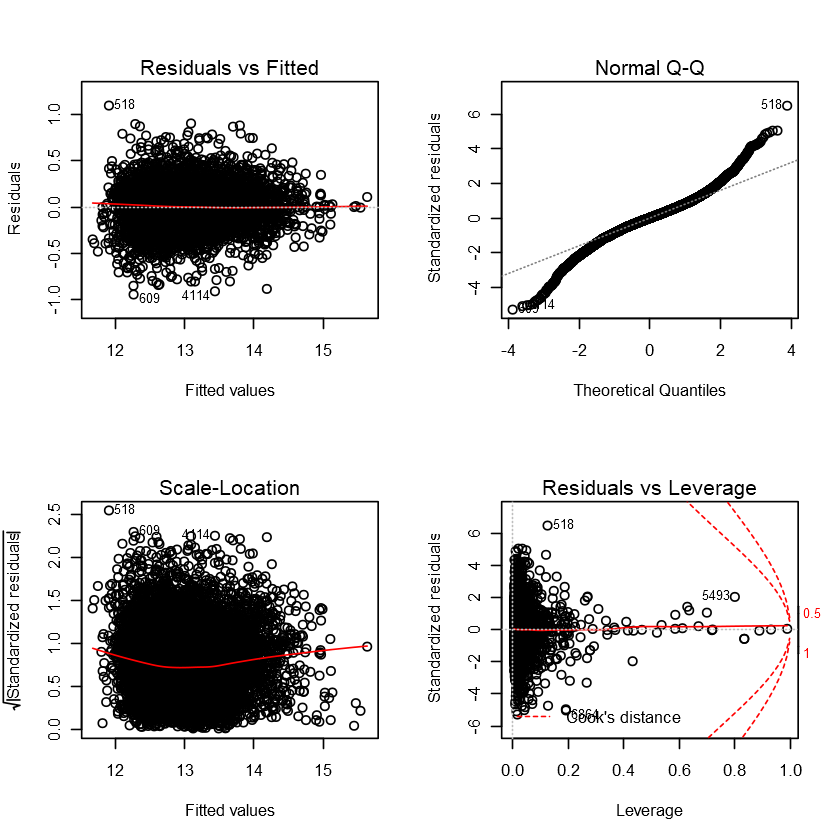

In [61]:
par(mfrow=c(2,2))
plot(house.model)

The model plots show:
- Residual vs Fitted - shows the residuals are evenly distributed around zero with no funnelling, so the model is meeting the assumption of homoscedasticity - the error terms are constant along the regression line.
- Normal Q-Q - the residuals deviate slightly from the dashed line, indicating the residuals have close to a normal distribution
- Scale-Location - The chart shows the variance of the residuals is reasonably constant
- Residuals vs Leverage - The chart shows there are some possibly influential outliers, however they are generally away from the Cook's line. 

Display the records for the unplotted observations

In [62]:
# Check the records in the warnings
predict.price <- train.predict[c(6061, 8099)]
cbind(predict.price,train[c(6061, 8099),])
#The model has managed to predict the unplotted observations correctly and so may be overfitting at these points.

,predict.price,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode,wf.zipcode,decade,bedroom.class
6061,262000,262000,1,0.75,520,12981,0,5,3,1920,98022,98022,2,4minus
8099,280000,280000,1,0.00,600,24501,0,2,3,1950,98045,98045,5,4minus


#### Check for Influential Outliers

In [63]:
outlierTest(house.model, cutoff=0.05, digits = 1)

      rstudent unadjusted p-value Bonferroni p
518   6.506883         8.0484e-11   8.0468e-07
609  -5.288826         1.2576e-07   1.2574e-03
4114 -5.086582         3.7134e-07   3.7126e-03
2091  5.060690         4.2534e-07   4.2525e-03
1642  5.059759         4.2741e-07   4.2733e-03
6864 -5.034347         4.8802e-07   4.8793e-03
9352 -5.013304         5.4441e-07   5.4430e-03
7951 -4.960080         7.1649e-07   7.1635e-03
3438  4.956397         7.3017e-07   7.3002e-03
4313  4.911909         9.1654e-07   9.1636e-03

The outlier test has reported several outliers, so generate an influence plot to see if these are influential outliers.

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
518,6.506883,0.12561401,0.028041165
609,-5.288826,0.01682005,0.002209346
5493,2.047778,0.80005055,0.077654683
6061,NaN,1.00000000,NaN
8099,NaN,1.00000000,NaN


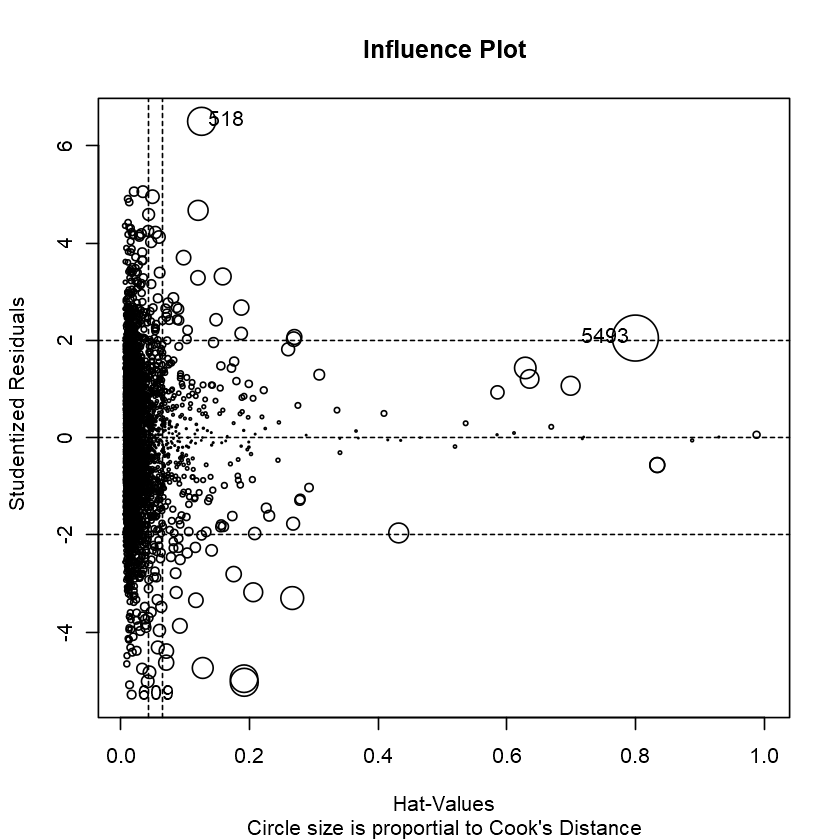

In [64]:
influencePlot(house.model, scale=5, id.method="noteworthy", main="Influence Plot",
              sub="Circle size is proportial to Cook's Distance" )

The influence plot shows quite a few influential points has reported three of them:
- 518 has a large studentized residual and is also an outlier. The large studentized residual means the model has made a poor prediction for this sample.
- 5493 and 6061 have large Hat values and so are significantly influencing the model.

### Using the Model to Predict Prices

#### Function to prepare the data for price prediction

Name: Prepare.Data

Input parameters:
- data - a dataframe that contains the test data. It should be in the same structure as the training dataset.

Return Value:

- A dataframe containing the prepared data

Description:

This function reformats the input dataframe to the format exptected by the model.
- Make a working copy of the data and remove the id and price columns, if they exist
- Change any grades or 1 or 2 to 3. These grades were not in the training data and the model will not run if the data contains these grades
- Factorise the categorical variables
- Create the generated variables wf.zipcode, decade and bedroom.class


In [65]:
Prepare.Data <- function(data) {
    # Remove the id and price columns
    newdata <- data
    newdata$id <- NULL
    newdata$price <- NULL

    # The model will fail if any grades of 1 or 2 are present, so change these to 3
    newdata$grade[newdata$grade < 3] <- 3
    
    # Set the factors
    newdata$waterfront <- as.factor(newdata$waterfront)
    newdata$condition <- as.factor(newdata$condition)
    newdata$grade <- as.factor(newdata$grade)
    newdata$zipcode <- as.factor(newdata$zipcode)

    # Generate the new variables
    newdata <- GenerateVariables(newdata)
    
    # Return the prepared dataframe
    return(newdata)
}


#### Predict the House Prices for the Testing Dataset

In [67]:
test <- read.csv("testing.csv")
test2 <- Prepare.Data(test)
houseTest.predict <- exp(predict(house.model,test2,type="response"))
print(head(cbind(PredictedPrice=houseTest.predict, ActualPrice=test$price),20))

   PredictedPrice ActualPrice
1       1158733.6     1146800
2        674695.0      950000
3        894635.2      850000
4        670568.6      599000
5        298266.5      255000
6        324204.2      280000
7        710347.8      715000
8        478906.6      550000
9        649824.9     1080000
10       497252.0      499000
11       269745.7      252350
12       287738.8      276900
13       742353.1      850000
14       327047.7      302495
15       352188.1      390000
16       797501.2      699000
17       654434.8      450000
18       581266.3      460000
19       280000.0      280000
20       231590.4      279000


The first twenty predicted prices are displayed along with the actual sale price. Most of these are reasonably close, but the model made poor predictions for records 2, 9 and 17.

In [70]:
test.rmse <- RMSE(houseTest.predict,test$price)
cat("RMSE for test predictions is:",test.rmse,"; which is",test.rmse*100/mean(test$price),"% of the mean house price.")

RMSE for test predictions is: 114024.7 ; which is 20.64769 % of the mean house price.

The root mean squared error for the price prediction of the development data is $114025, which is 20.7% of the mean house price. This is a slightly better than expected result, as the percentage error of the model based on the RSE is 22.5%.

#### Check the uncertainty of the expected value of predictions

In [71]:
print(head(exp(predict(house.model,newdata=test2,interval="confidence")),20))

         fit       lwr       upr
1  1158733.6 1061531.5 1264836.3
2   674695.0  649396.7  700978.8
3   894635.2  850748.3  940786.0
4   670568.6  642353.4  700023.1
5   298266.5  273907.3  324791.9
6   324204.2  313039.0  335767.8
7   710347.8  685305.6  736305.0
8   478906.6  463960.6  494334.1
9   649824.9  615232.3  686362.6
10  497252.0  480154.0  514958.7
11  269745.7  262285.3  277418.2
12  287738.8  274402.2  301723.7
13  742353.1  689113.9  799705.5
14  327047.7  314975.5  339582.5
15  352188.1  338915.6  365980.5
16  797501.2  773051.9  822723.7
17  654434.8  615885.0  695397.6
18  581266.3  533772.6  632986.0
19  280000.0  196355.0  399276.8
20  231590.4  220246.2  243518.9


The confidence intervals are generally about 10% of the fitted value, so on average the predictions should be within 10% of the actual sale price.

In [72]:
print(head(exp(predict(house.model,newdata=test2,interval="prediction")),20))

         fit      lwr       upr
1  1158733.6 803969.8 1670042.5
2   674695.0 472172.0  964083.6
3   894635.2 625157.4 1280272.8
4   670568.6 469029.9  958707.1
5   298266.5 207066.1  429635.3
6   324204.2 226961.8  463110.4
7   710347.8 497243.1 1014783.2
8   478906.6 335367.4  683881.5
9   649824.9 453795.2  930535.2
10  497252.0 348107.2  710296.9
11  269745.7 188954.7  385080.2
12  287738.8 201145.5  411610.7
13  742353.1 516585.3 1066790.2
14  327047.7 228892.6  467294.1
15  352188.1 246466.7  503258.5
16  797501.2 558499.9 1138779.3
17  654434.8 456573.9  938040.7
18  581266.3 403529.6  837288.1
19  280000.0 169513.8  462499.3
20  231590.4 161833.5  331415.3


The prediction intervals seem quite large compared to the fitted values, suggesting that there is a high level of uncertainty around each prediction. 